In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from keras.callbacks import EarlyStopping

In [2]:
#Importing MNIST dataset from tensorflow keras
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


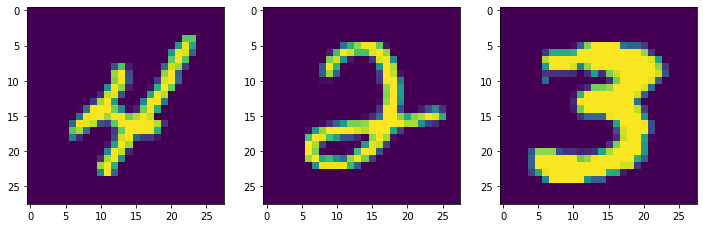

In [3]:
#Plotting certain images from the dataset
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
axes[0].imshow(trainval_x[9])
axes[1].imshow(trainval_x[16])
axes[2].imshow(trainval_x[27])
plt.show()

In [4]:
#Converting the data from utf-8 format to float format
trainval_x = np.float32(trainval_x)
trainval_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
#Converting the test data from utf-8 format to float format
test_x = np.float32(test_x)
test_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

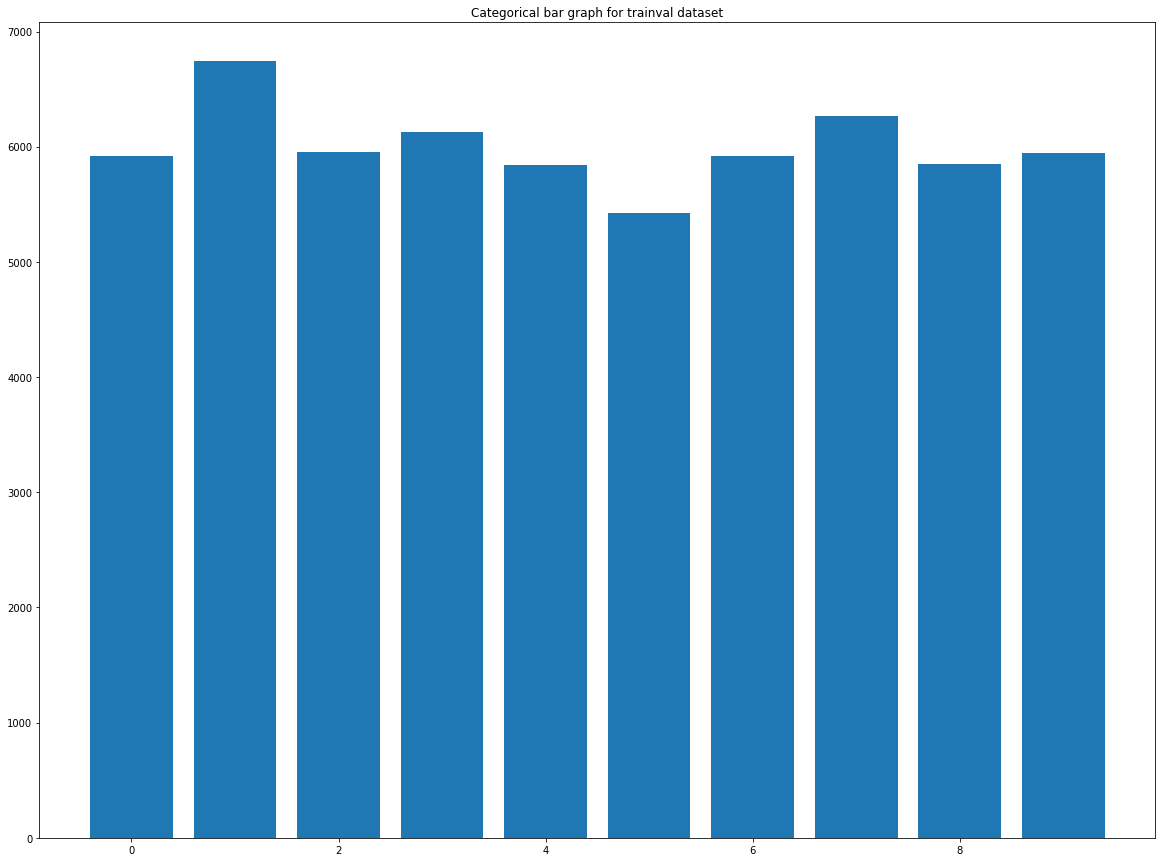

In [6]:
#Plot the categories to see if data is balanced in trainval dataset
unique, counts = np.unique(trainval_y, return_counts=True)
plt.figure(figsize=(20, 15))
plt.bar(unique , counts)
plt.title('Categorical bar graph for trainval dataset')
plt.show()

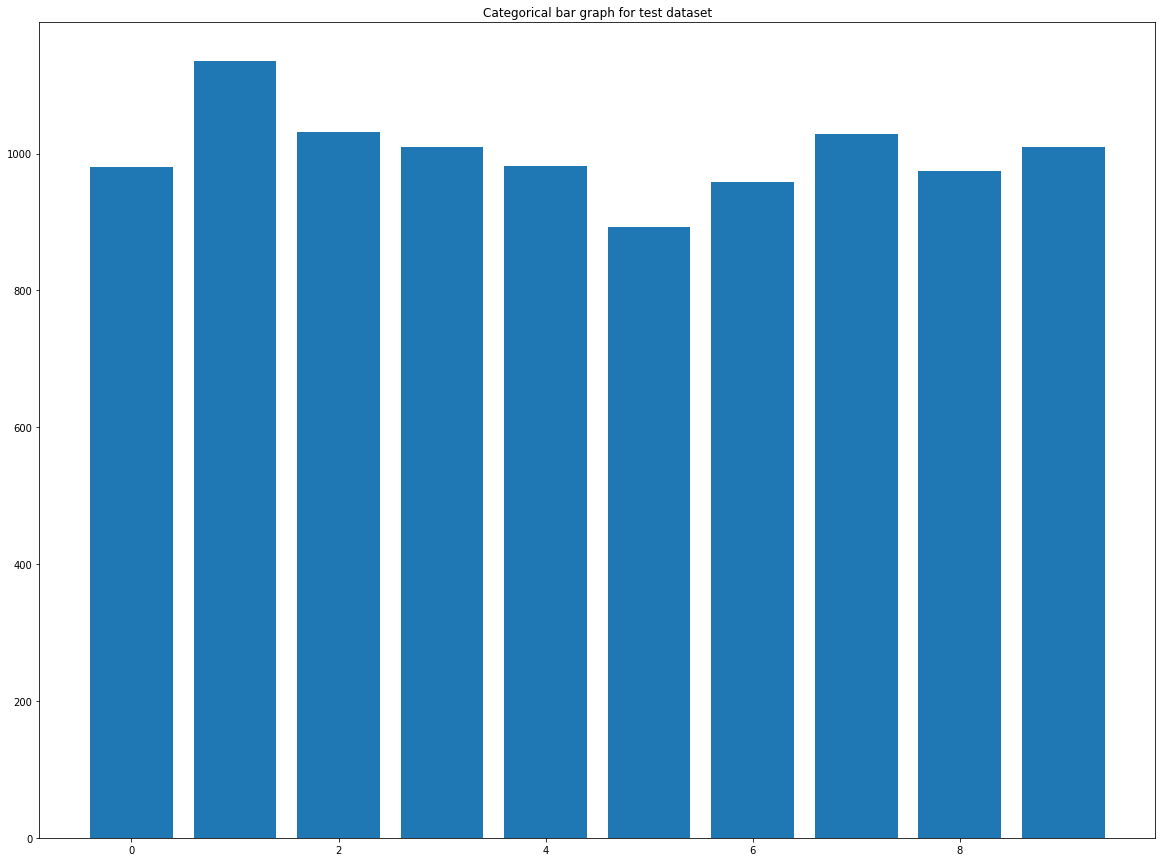

In [7]:
#Plot the categories to see if data is balanced in trainval dataset
unique, counts = np.unique(test_y, return_counts=True)
plt.figure(figsize=(20, 15))
plt.bar(unique , counts)
plt.title('Categorical bar graph for test dataset')
plt.show()

In [8]:
#Flattenning the list of images to create a long array of 784 numbers 
trainval_x_flat = []
for i in range(len(trainval_x)):
  trainval_x_flat.append([y for x in trainval_x[i] for y in x])

In [9]:
#Converting flat list array to numpy array
trainval_x_flat = np.array(trainval_x_flat)
trainval_x_flat.shape

(60000, 784)

###**Reducing the data dimensionality**

In [10]:
#Taking PCA dimensionality reduction for upto 700 components
from sklearn.decomposition import PCA
pca_test = PCA(n_components=700, svd_solver = 'randomized', random_state=42)
pca_test.fit(trainval_x_flat)

pca_test.explained_variance_ratio_

array([9.70480219e-02, 7.09601417e-02, 6.16918132e-02, 5.38950078e-02,
       4.86886539e-02, 4.31229360e-02, 3.27197574e-02, 2.88393758e-02,
       2.76206769e-02, 2.35703196e-02, 2.10921820e-02, 2.02301815e-02,
       1.71584226e-02, 1.69213582e-02, 1.57866385e-02, 1.48297390e-02,
       1.32458024e-02, 1.27691505e-02, 1.18727973e-02, 1.15270056e-02,
       1.06618125e-02, 1.00672776e-02, 9.53587331e-03, 9.12556145e-03,
       8.83417856e-03, 8.39331280e-03, 8.12590215e-03, 7.86377117e-03,
       7.44743785e-03, 6.90868683e-03, 6.58103358e-03, 6.48157299e-03,
       6.02623634e-03, 5.86591195e-03, 5.70029905e-03, 5.43634873e-03,
       5.05793374e-03, 4.87865414e-03, 4.81436262e-03, 4.72273119e-03,
       4.56753280e-03, 4.44842596e-03, 4.18507401e-03, 3.98221007e-03,
       3.84979951e-03, 3.75108677e-03, 3.62013932e-03, 3.51596135e-03,
       3.40062845e-03, 3.21879075e-03, 3.19021801e-03, 3.12809367e-03,
       2.95987003e-03, 2.88958754e-03, 2.84134527e-03, 2.71439762e-03,
      

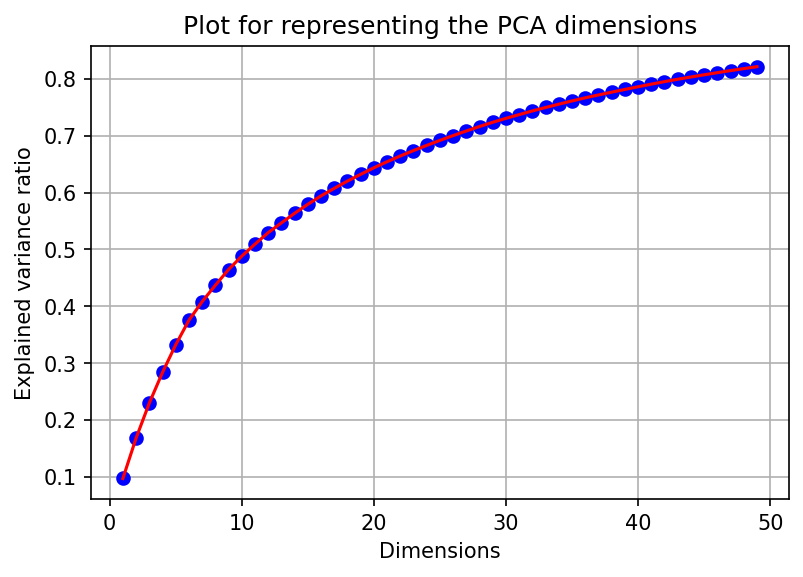

In [11]:
#Plotting the graph for explained variances by the PCA for a certiain number of dimensions
dim = list(range(1, 50))
var = [sum(pca_test.explained_variance_ratio_[:i]) for i in dim]

plt.figure(dpi=150)
plt.plot(dim, var, 'bo')
plt.plot(dim, var, 'r-')
plt.xlabel('Dimensions')
plt.ylabel('Explained variance ratio')
plt.title('Plot for representing the PCA dimensions')
plt.grid()
plt.show()

In [12]:
#Training the model with 20 dimensions as it is the sharp turn corner after which, increment in the dimensions does not lead to much of a difference
from sklearn.decomposition import PCA
dim = 45
pca = PCA(n_components=dim, svd_solver='randomized', random_state=42)
pca.fit(trainval_x_flat)

trainval_x_flat = pca.transform(trainval_x_flat)

In [13]:
#The array is 2-D but the neural network needs 3-D array so converting the data int correct format
trainval_x_flat = [[x] for x in trainval_x_flat]

In [14]:
#Converting the 3-D array to numpy array
trainval_x_flat = np.array(trainval_x_flat)
trainval_x_flat, trainval_x_flat.shape

(array([[[ 1.23932556e+02, -3.12674500e+02, -2.45152283e+01, ...,
          -4.05520172e+01, -8.38100662e+01, -1.28073273e+02]],
 
        [[ 1.01171851e+03, -2.94858551e+02,  5.96336792e+02, ...,
           6.88302917e+01, -1.65280457e+02, -1.09663658e+01]],
 
        [[-5.18496246e+01,  3.92173462e+02, -1.88509079e+02, ...,
           9.55397797e+01, -9.00756836e-01, -2.29328491e+02]],
 
        ...,
 
        [[-1.78053513e+02,  1.60078003e+02, -2.57614166e+02, ...,
          -2.40360931e+02, -2.62512417e+01, -2.66057873e+01]],
 
        [[ 1.30606094e+02, -5.59301567e+00,  5.13857544e+02, ...,
          -1.92991440e+02, -9.39277496e+01, -9.16092224e+01]],
 
        [[-1.73435913e+02, -2.47194901e+01,  5.56018250e+02, ...,
           8.25285187e+01, -6.81222229e+01,  9.06378098e+01]]],
       dtype=float32), (60000, 1, 45))

In [15]:
#Creating a validation set from the train dataset
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(trainval_x_flat, trainval_y, test_size = 0.2, random_state = 42)
train_x.shape, val_x.shape, test_x.shape, train_y.shape, val_y.shape, test_y.shape

((48000, 1, 45), (12000, 1, 45), (10000, 28, 28), (48000,), (12000,), (10000,))

###**Creating data chunks**

In [16]:
#Creating data chunks of train, validation and testing datasets
data_chunks = 5
train_x_list = []
train_y_list = []
val_x_list = []
val_y_list = []
split_point_train = int(len(train_x)/data_chunks)
split_point_val = int(len(val_x)/data_chunks)

for i in range(data_chunks-1):
  train_x_list.append(train_x[(i*split_point_train):((i+1)*split_point_train)])
  train_y_list.append(train_y[(i*split_point_train):((i+1)*split_point_train)])
  val_x_list.append(val_x[(i*split_point_val):((i+1)*split_point_val)])
  val_y_list.append(val_y[(i*split_point_val):((i+1)*split_point_val)])


train_x_list.append(train_x[((data_chunks-1)*split_point_train):])
train_y_list.append(train_y[((data_chunks-1)*split_point_train):])
val_x_list.append(val_x[((data_chunks-1)*split_point_val):])
val_y_list.append(val_y[((data_chunks-1)*split_point_val):])

train_x_list = np.array(train_x_list)
train_y_list = np.array(train_y_list)
val_x_list = np.array(val_x_list)
val_y_list = np.array(val_y_list)
train_x_list.shape, train_y_list.shape, val_x_list.shape, val_y_list.shape

((5, 9600, 1, 45), (5, 9600), (5, 2400, 1, 45), (5, 2400))

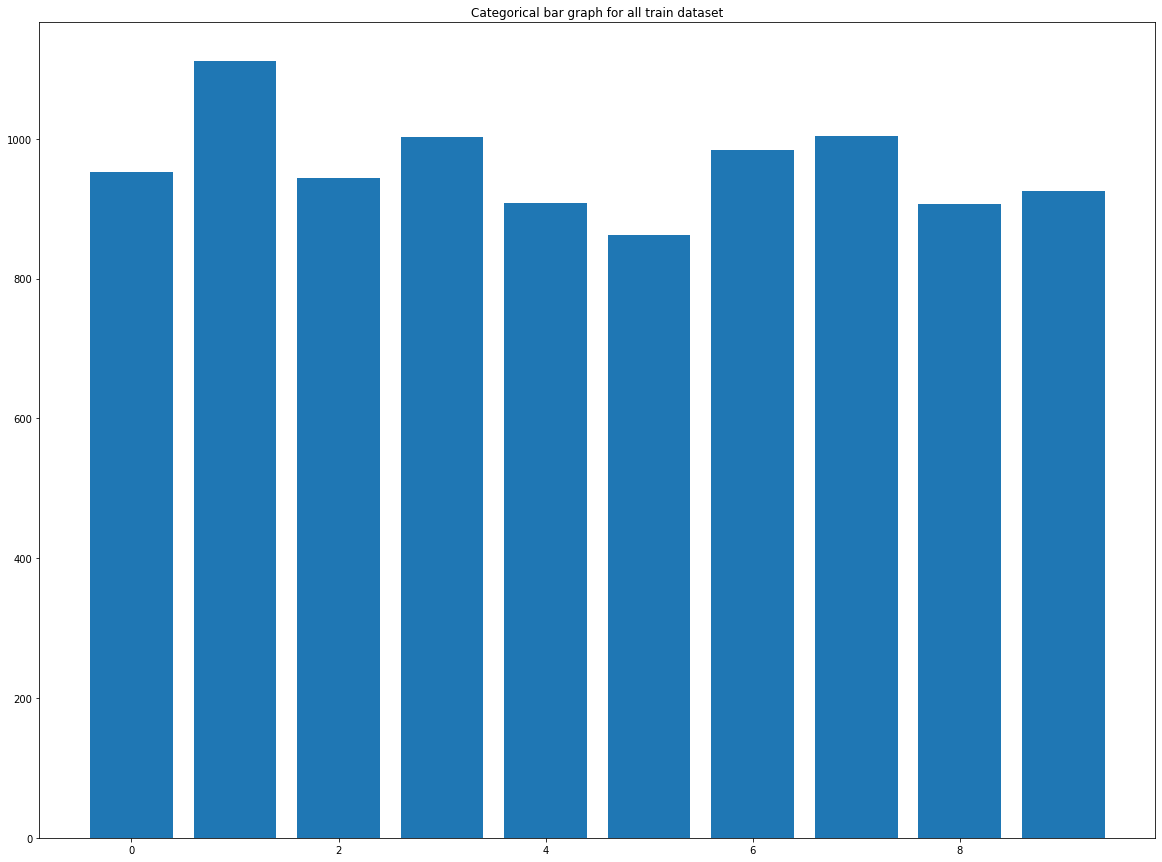

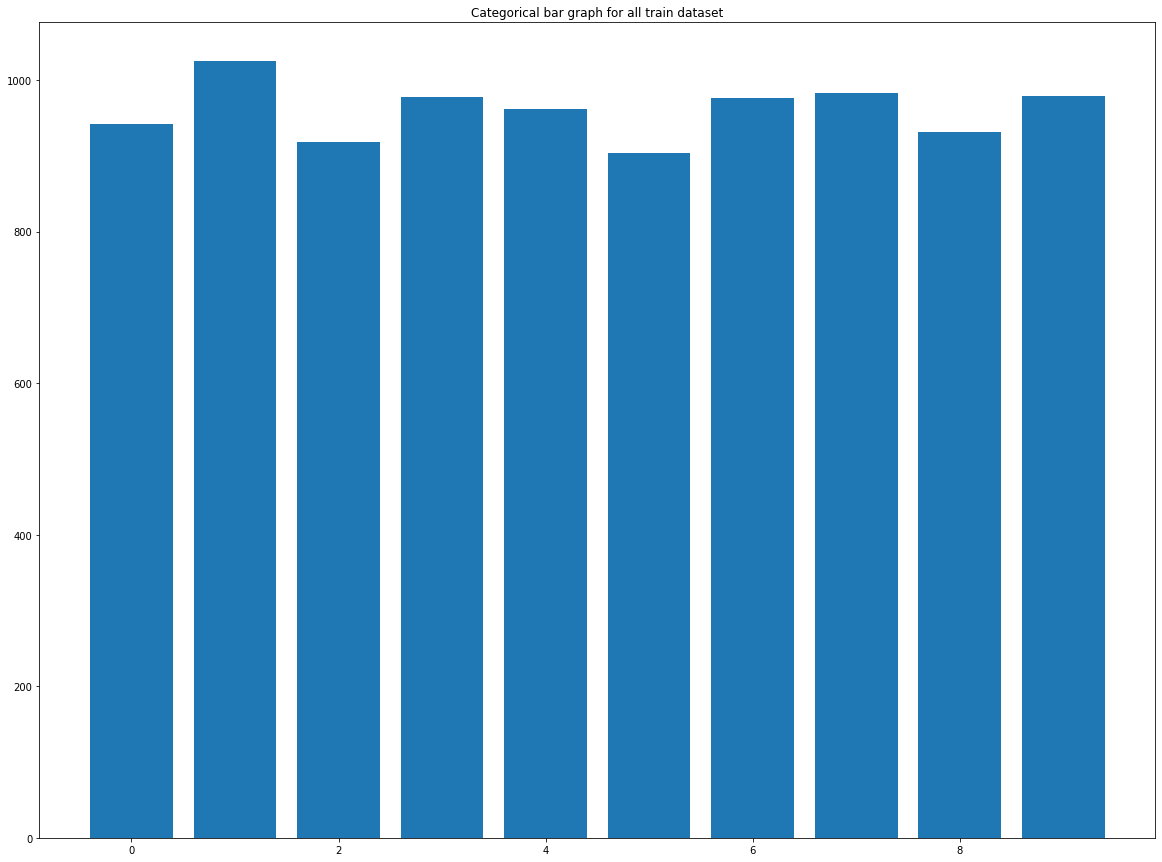

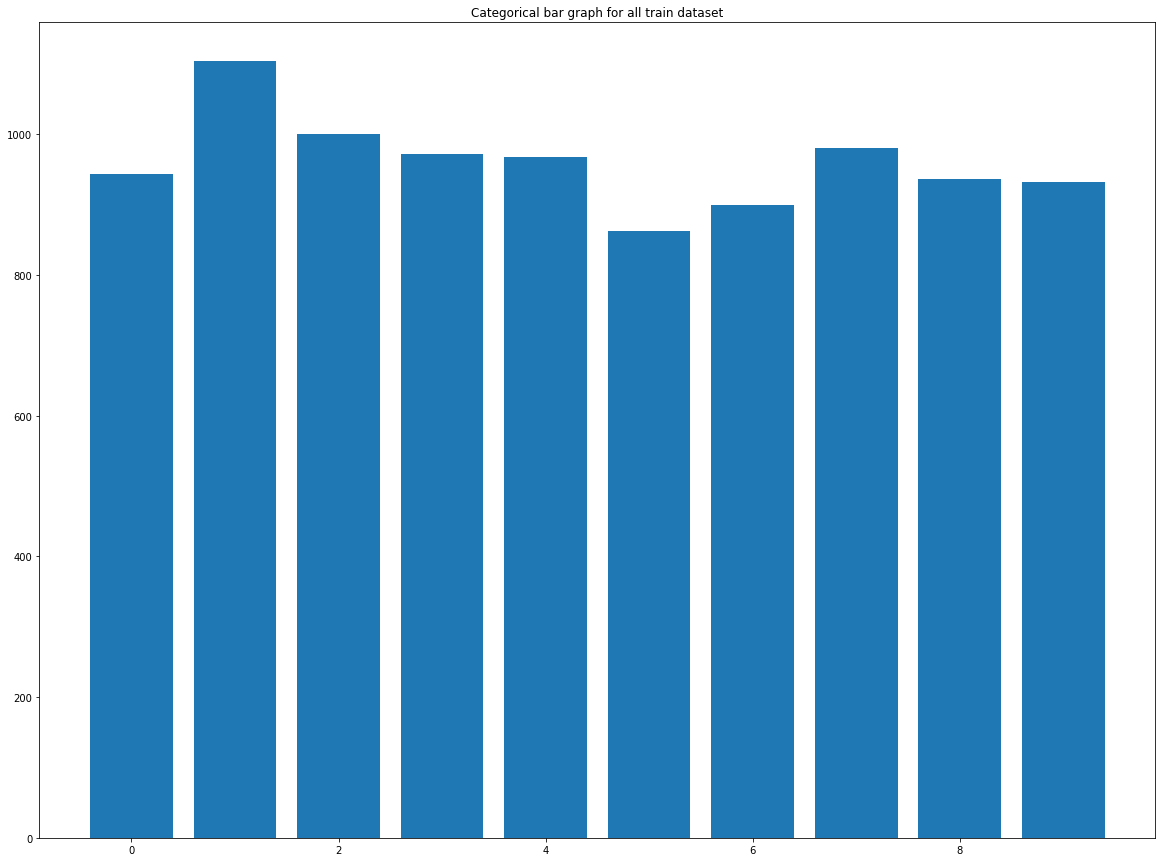

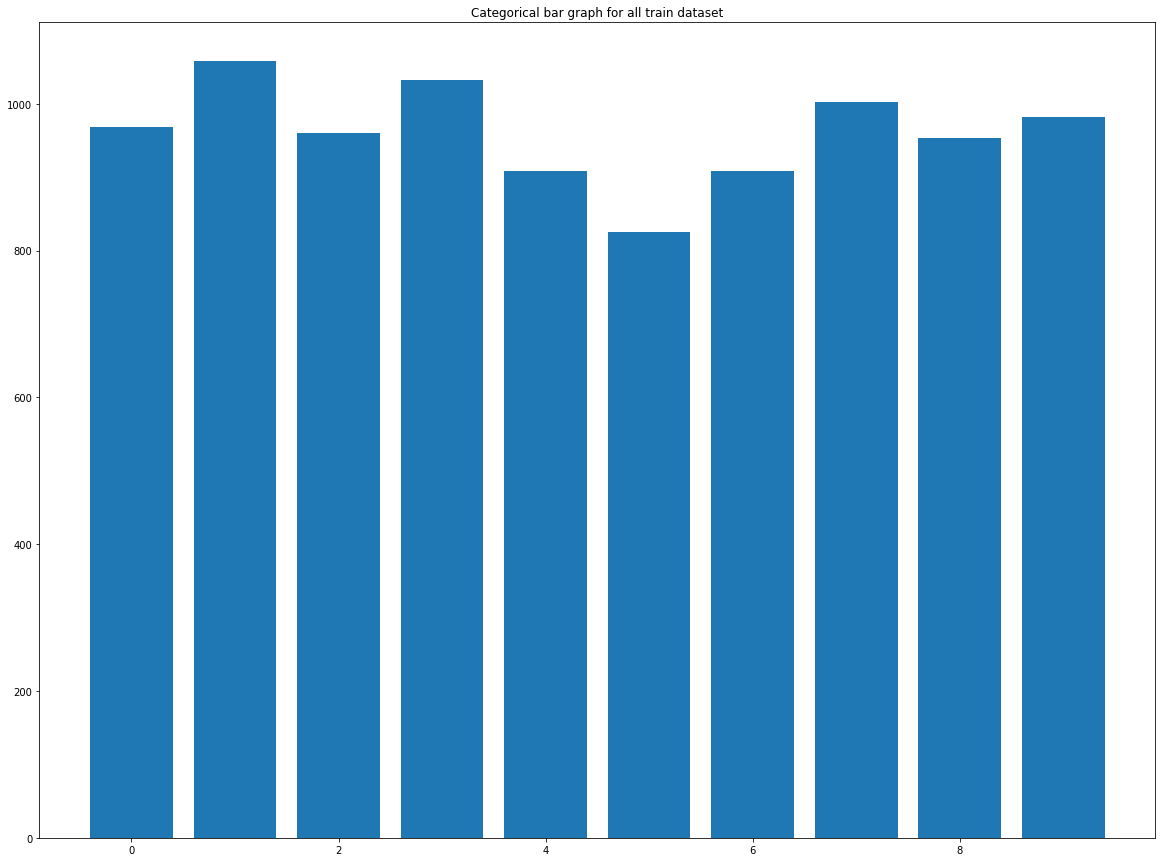

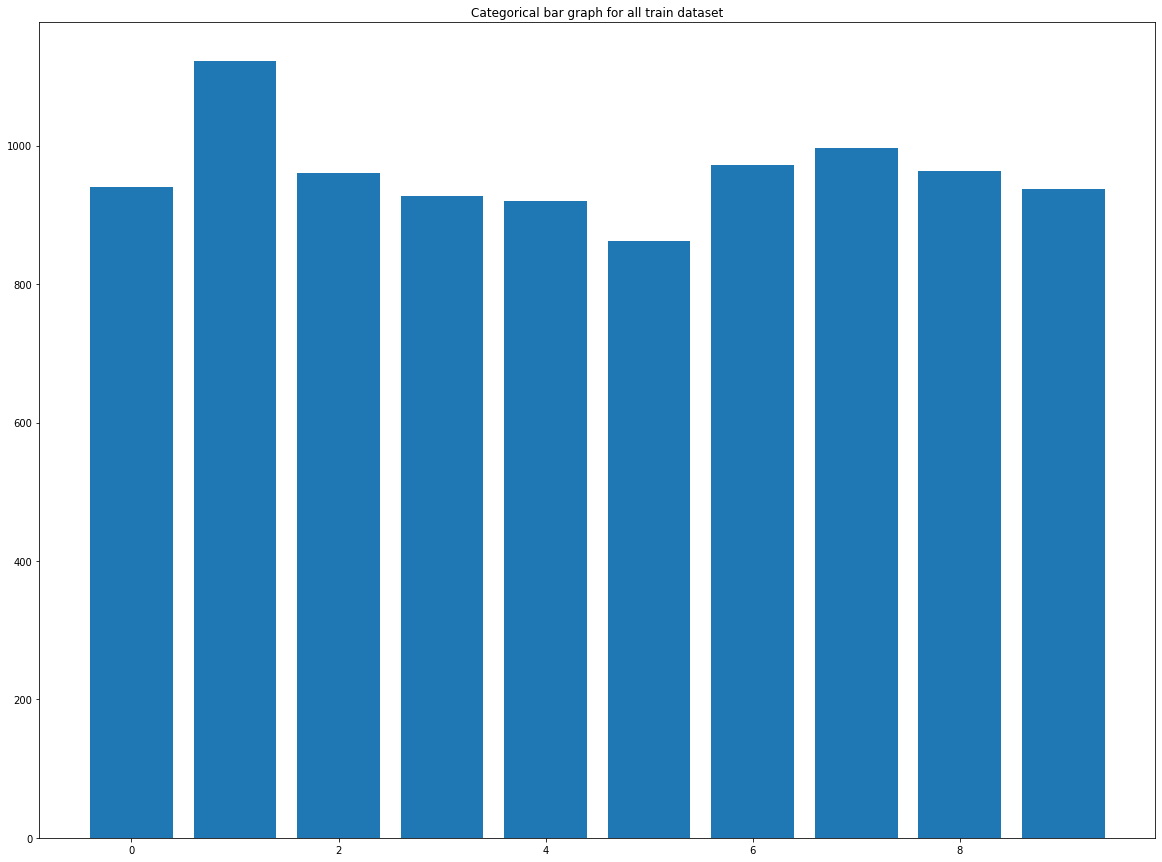

In [17]:
#Plot the categories to see if data is balanced in all train datasets
for i in range(data_chunks):
  unique, counts = np.unique(train_y_list[i], return_counts=True)
  plt.figure(figsize=(20, 15))
  plt.bar(unique , counts)
  plt.title('Categorical bar graph for all train dataset')
  plt.show()

###**Model Training**

In [18]:
#Initializing blank model and history dictionaries
nn_model_dict = {}
history = {}

In [19]:
#Creating and fitting 5 models
for i in range(data_chunks):
  nn_model_dict['model{0}'.format(i)] = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape = (1, dim)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(10)
  ])
  nn_model_dict['model{0}'.format(i)].compile(optimizer='adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics='accuracy')
  print(nn_model_dict['model{0}'.format(i)].summary())
  history['model_history_{0}'.format(i)] = nn_model_dict['model{0}'.format(i)].fit(train_x_list[i], train_y_list[i],
                       epochs=100, 
                       validation_data=(val_x_list[i], val_y_list[i]), 
                       callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               5888      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 16,554
Trainable params: 16,554
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
300/300 [==============================] - 4s 3ms/step - loss: 24.1444 - accuracy: 0.5527 - val_loss:

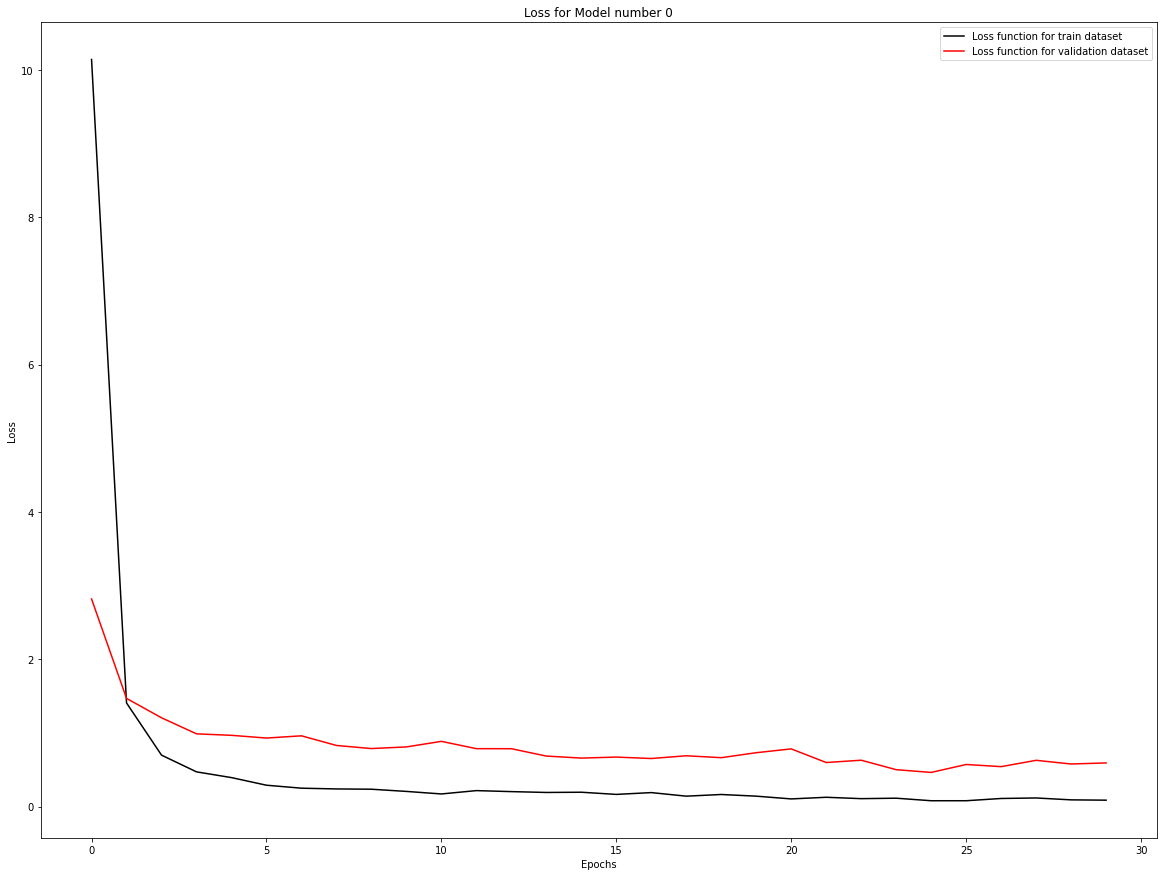

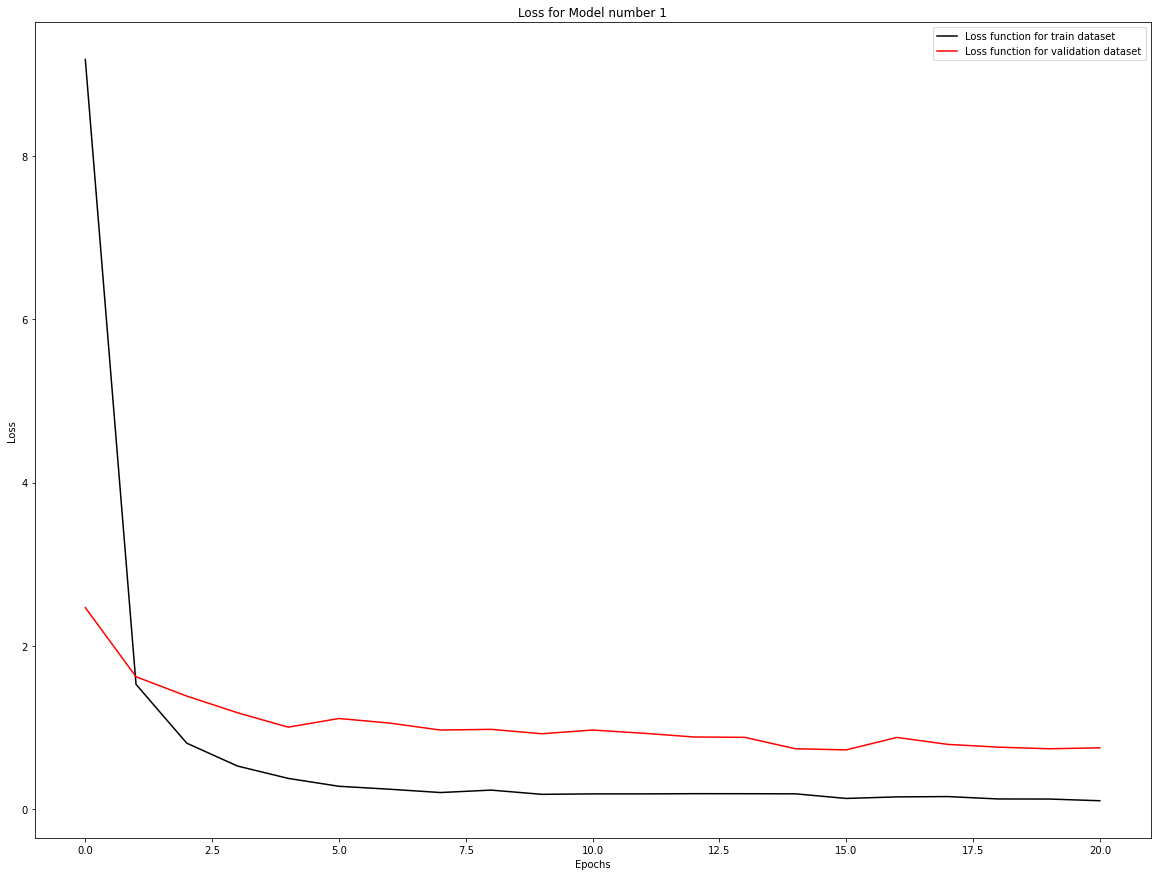

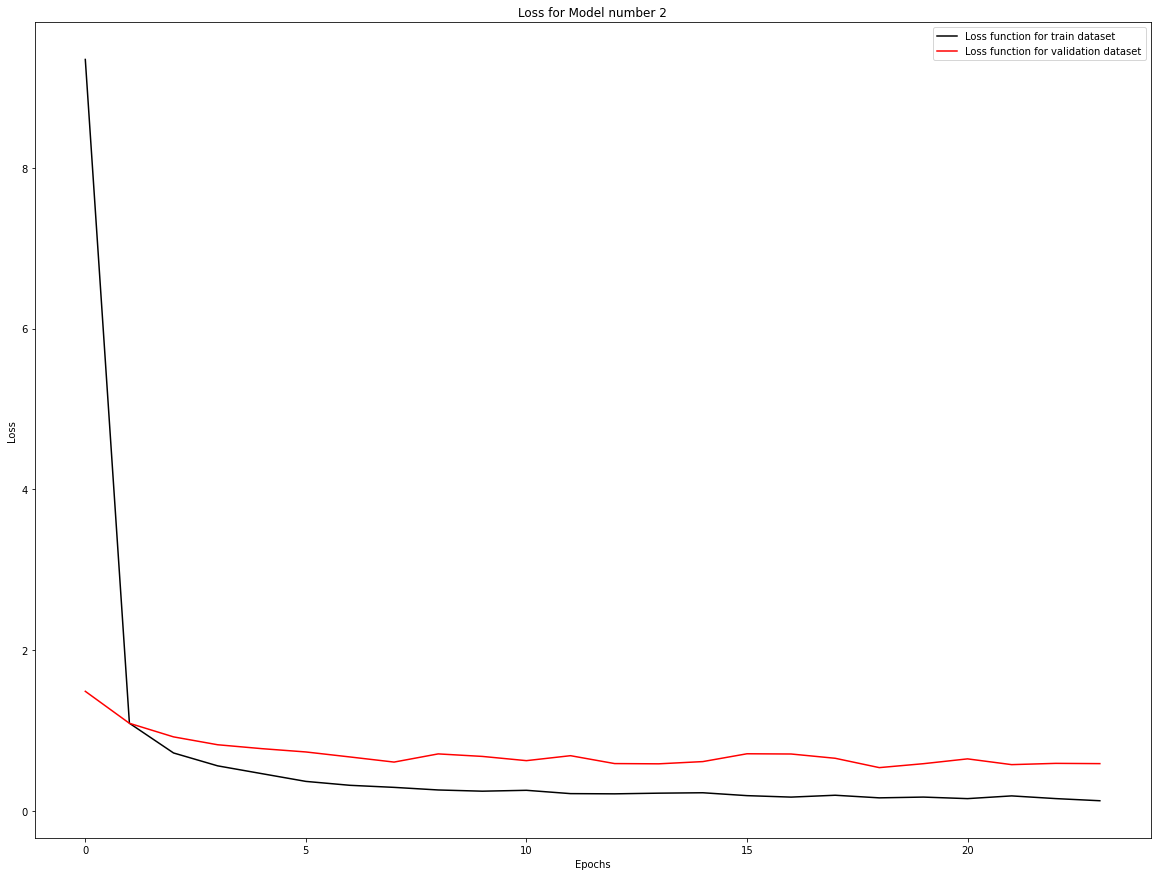

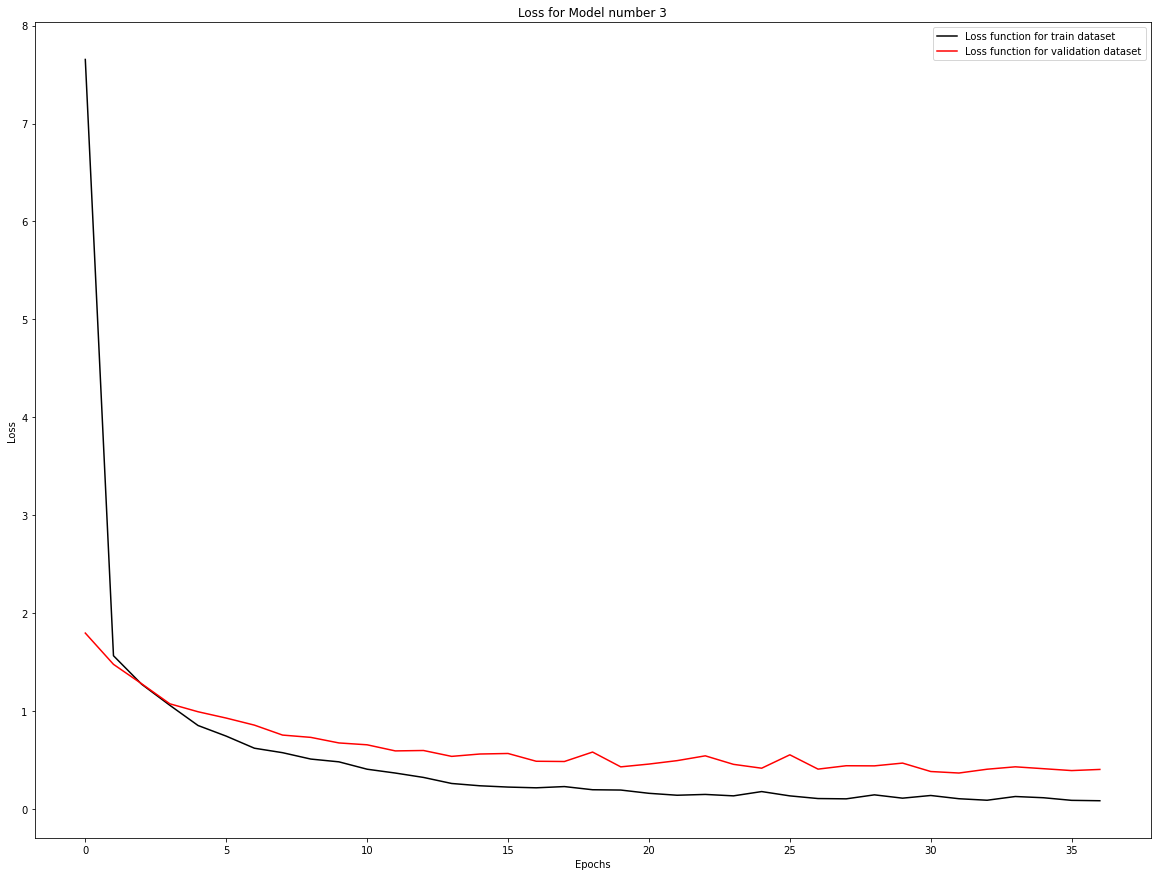

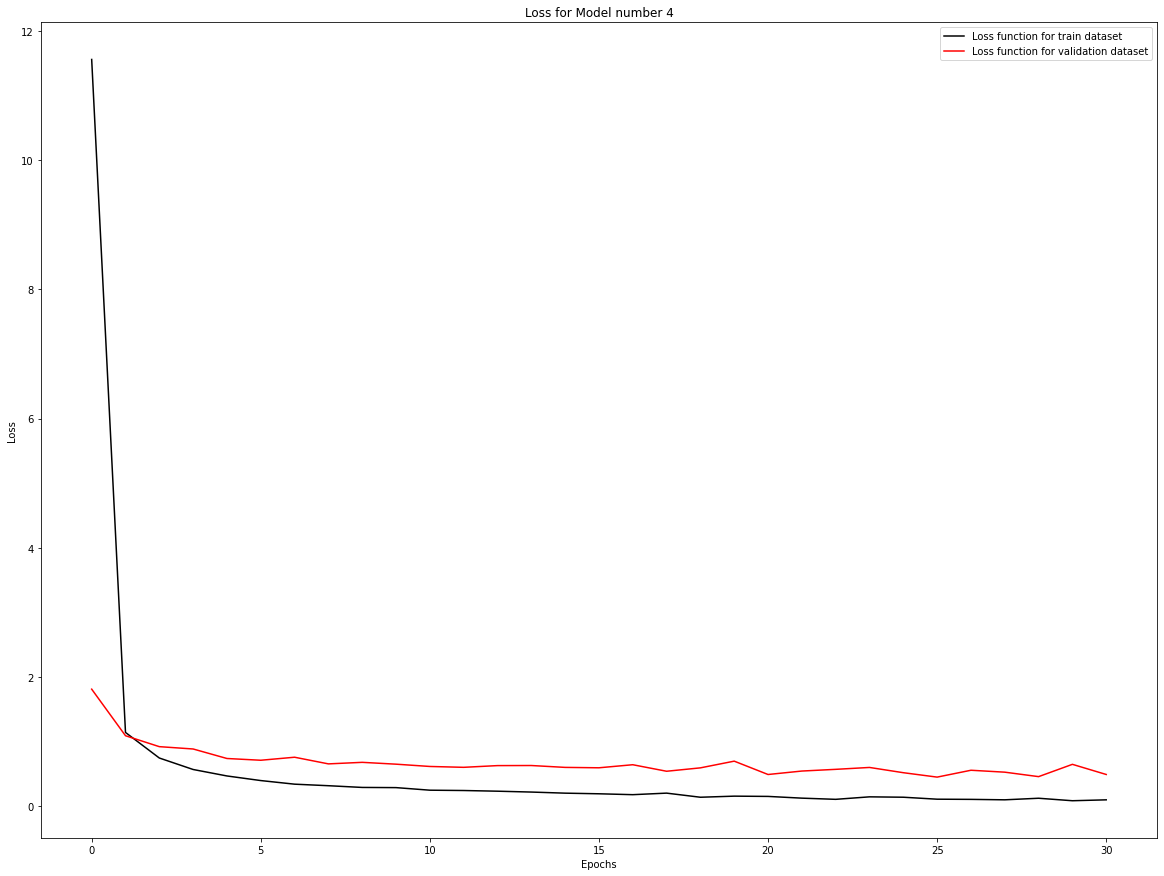

In [20]:
for i in range(data_chunks):
  #Plotting the graph for train loss and validation loss for all 5 models
  plt.figure(figsize=(20, 15))
  plt.plot(history['model_history_{0}'.format(i)].history['loss'], 'k-', label = 'Loss function for train dataset')
  plt.plot(history['model_history_{0}'.format(i)].history['val_loss'], 'r-', label = 'Loss function for validation dataset')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss for Model number {0}'.format(i))
  plt.legend()
  plt.show()

###**Getting the Feature Importance list for the datasets**

In [21]:
#Creating a dictionary with dataframes as structure to hold all the training datasets
df_dict_train = {}
for i in range(data_chunks):
  x_train = train_x_list[i]
  x_train = [y for x in x_train for y in x]
  x_train = np.array(x_train)
  y_train = train_y_list[i]
  df_dict_train['df{0}'.format(i)] = pd.DataFrame(x_train, columns=range(dim))
  df_dict_train['df{0}'.format(i)]['y'] = y_train
df_dict_train

{'df0':                0           1           2  ...          43          44  y
 0     232.334488 -143.275024 -538.480286  ...  -99.813103   -6.871117  5
 1     505.012360   -8.355331  243.245850  ...  -91.265823   89.078011  0
 2    -916.062622 -721.119507  330.062622  ...  -20.961275    0.976921  1
 3    -207.723816 -434.473328  537.321533  ...    3.254822  331.296326  6
 4    -952.794739 -402.277771  -46.095009  ...   16.186930 -167.627274  1
 ...          ...         ...         ...  ...         ...         ... ..
 9595   33.791412  727.375671  229.348297  ...  -85.967430  -29.531910  9
 9596 -279.005432 -301.003845  512.699036  ...  220.505661  129.053024  8
 9597   61.145454  653.798218 -273.913513  ... -179.348511  -14.464247  8
 9598 -115.252289  878.179626  323.361908  ... -103.321915  162.650024  7
 9599    4.046707  164.222473 -185.343536  ...   34.119987   51.366554  8
 
 [9600 rows x 46 columns],
 'df1':                0            1           2  ...          43          

In [22]:
#Getting the importance score for each train dataframe using SelectKBest method
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = range(dim)
scores_traindf = {}

for i in range(data_chunks):
  # Perform feature selection
  selector = SelectKBest(f_classif)
  new = selector.fit_transform(df_dict_train['df{0}'.format(i)][range(dim)], df_dict_train['df{0}'.format(i)]['y'])
  scores_traindf['df{0}'.format(i)] = {}
  for j in range(len(selector.scores_)):
    scores_traindf['df{0}'.format(i)][j] = selector.scores_[j]
scores_traindf

{'df0': {0: 1514.8337,
  1: 2034.6735,
  2: 229.30417,
  3: 829.6013,
  4: 784.61475,
  5: 431.02936,
  6: 306.72855,
  7: 389.03046,
  8: 79.761086,
  9: 96.4788,
  10: 60.247517,
  11: 107.29879,
  12: 187.2952,
  13: 62.40793,
  14: 170.11223,
  15: 107.83939,
  16: 100.498795,
  17: 29.443312,
  18: 62.770508,
  19: 80.99816,
  20: 21.49445,
  21: 52.711662,
  22: 66.09823,
  23: 10.821332,
  24: 20.870691,
  25: 52.849525,
  26: 37.419403,
  27: 33.61871,
  28: 26.239159,
  29: 21.285688,
  30: 28.88787,
  31: 29.852705,
  32: 16.220646,
  33: 32.6699,
  34: 18.452805,
  35: 22.204485,
  36: 10.672449,
  37: 9.69051,
  38: 4.609353,
  39: 23.356325,
  40: 16.267317,
  41: 14.613161,
  42: 17.502481,
  43: 13.621211,
  44: 15.6930485},
 'df1': {0: 1451.7778,
  1: 2025.6763,
  2: 229.89145,
  3: 853.35516,
  4: 748.71674,
  5: 415.98477,
  6: 334.4989,
  7: 378.71143,
  8: 70.80481,
  9: 95.37324,
  10: 49.241283,
  11: 95.05837,
  12: 202.1419,
  13: 62.24893,
  14: 155.89284,
  15

In [23]:
#Using heapq library to find the keys with maximum score for each dataframe in descending order
import heapq

important_features_traindf = {}

for i in range(data_chunks):
  important_features_traindf['df{0}'.format(i)] = heapq.nlargest(dim, scores_traindf['df{0}'.format(i)], key=scores_traindf['df{0}'.format(i)].get)
important_features_traindf

{'df0': [1,
  0,
  3,
  4,
  5,
  7,
  6,
  2,
  12,
  14,
  15,
  11,
  16,
  9,
  19,
  8,
  22,
  18,
  13,
  10,
  25,
  21,
  26,
  27,
  33,
  31,
  17,
  30,
  28,
  39,
  35,
  20,
  29,
  24,
  34,
  42,
  40,
  32,
  44,
  41,
  43,
  23,
  36,
  37,
  38],
 'df1': [1,
  0,
  3,
  4,
  5,
  7,
  6,
  2,
  12,
  14,
  15,
  16,
  9,
  11,
  8,
  19,
  18,
  13,
  22,
  25,
  10,
  26,
  21,
  30,
  17,
  28,
  33,
  39,
  24,
  27,
  31,
  44,
  35,
  20,
  29,
  42,
  40,
  32,
  43,
  41,
  34,
  23,
  37,
  36,
  38],
 'df2': [1,
  0,
  3,
  4,
  5,
  7,
  6,
  2,
  12,
  14,
  15,
  9,
  11,
  19,
  16,
  8,
  18,
  13,
  22,
  10,
  26,
  21,
  25,
  33,
  17,
  30,
  27,
  24,
  28,
  31,
  39,
  20,
  42,
  35,
  44,
  32,
  40,
  29,
  23,
  41,
  43,
  37,
  34,
  36,
  38],
 'df3': [1,
  0,
  4,
  3,
  5,
  7,
  6,
  2,
  12,
  14,
  11,
  9,
  15,
  19,
  16,
  8,
  22,
  18,
  13,
  10,
  25,
  26,
  21,
  30,
  33,
  27,
  17,
  20,
  28,
  42,
  39,
  31,
  29,
 

###**Creating the test dataset and its splitted datasets**

In [24]:
#Converting test images to long vector format
test_x_flat = []
for i in range(len(test_x)):
  test_x_flat.append([y for x in test_x[i] for y in x])

In [25]:
#Converting list into numpy array
test_x_flat = np.array(test_x_flat)
test_x_flat.shape

(10000, 784)

In [26]:
#Applying PCA transformation to the test images
test_x_flat = pca.transform(test_x_flat)
test_x_flat.shape

(10000, 45)

In [27]:
#Converting test data to 3-D list
test_x_flat = [[x] for x in test_x_flat]

In [28]:
#Converting the list to numpy array format
test_x_flat = np.array(test_x_flat)
test_x_flat, test_x_flat.shape

(array([[[-3.3227115e+02,  7.4779852e+02, -4.2844742e+01, ...,
           1.0764090e+02, -3.2793819e+01, -1.6385693e+02]],
 
        [[ 2.0696899e+01, -9.5558429e+02, -1.5271666e+02, ...,
          -2.1817564e+02,  1.4174718e+02,  6.0746303e+00]],
 
        [[-9.4602692e+02, -4.3084326e+02,  6.6175140e+01, ...,
           7.6418053e+01, -8.3623375e+01,  3.5989109e+01]],
 
        ...,
 
        [[-2.7018781e+02,  5.9686969e+02,  3.5511215e+02, ...,
          -1.6659451e-01, -3.3802834e+01,  2.4143517e+01]],
 
        [[-3.1402728e+02, -1.0860466e+02,  6.4283875e+02, ...,
          -7.0182304e+00,  8.4634995e+01,  5.0747601e+01]],
 
        [[ 1.0423895e+03, -9.0515793e+01,  7.0611920e+02, ...,
          -1.1449830e+02, -1.7031168e+02, -1.9659213e+02]]], dtype=float32),
 (10000, 1, 45))

In [29]:
#Creating splits of test data to test the concept on multiple different datasets
test_x_list = []
test_y_list = []
split_point_test = int(len(test_x)/data_chunks)

for i in range(data_chunks-1):
  test_x_list.append(test_x_flat[(i*split_point_test):((i+1)*split_point_test)])
  test_y_list.append(test_y[(i*split_point_test):((i+1)*split_point_test)])


test_x_list.append(test_x_flat[((data_chunks-1)*split_point_test):])
test_y_list.append(test_y[((data_chunks-1)*split_point_test):])

test_x_list = np.array(test_x_list)
test_y_list = np.array(test_y_list)
test_x_list.shape, test_y_list.shape

((5, 2000, 1, 45), (5, 2000))

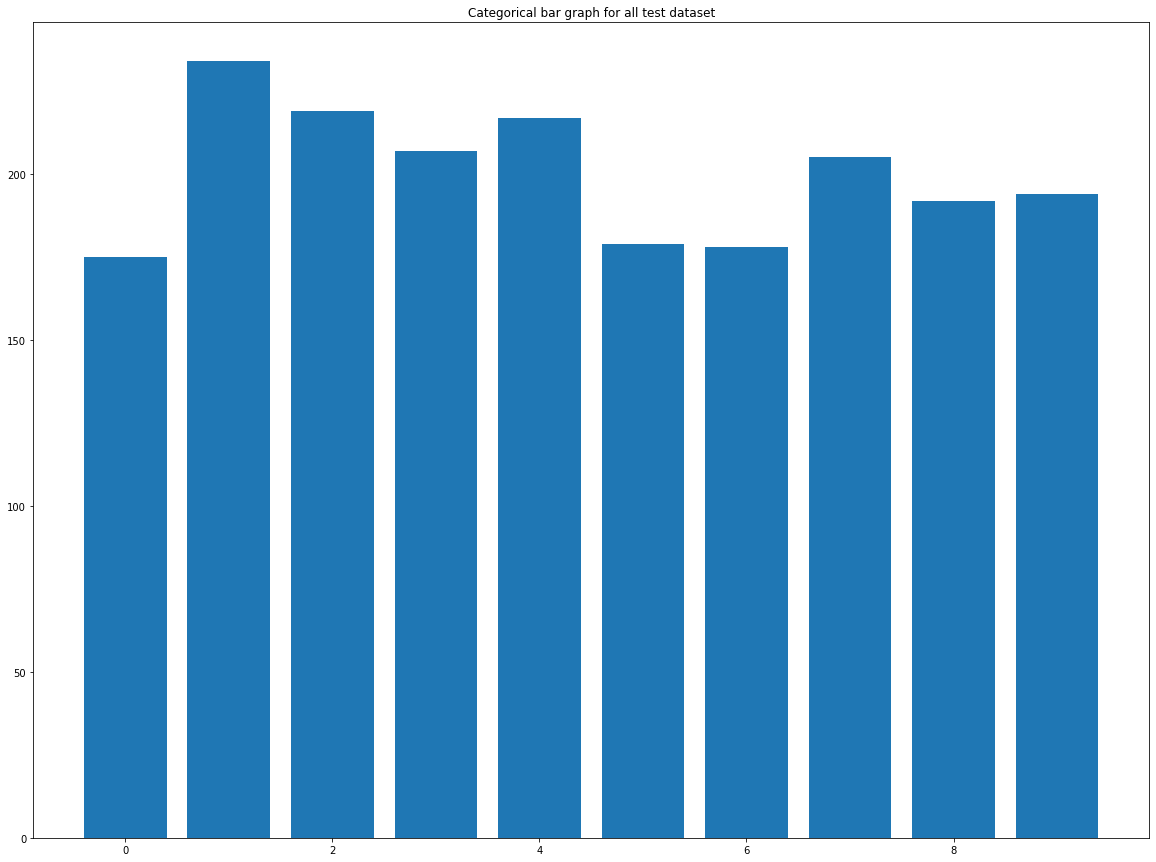

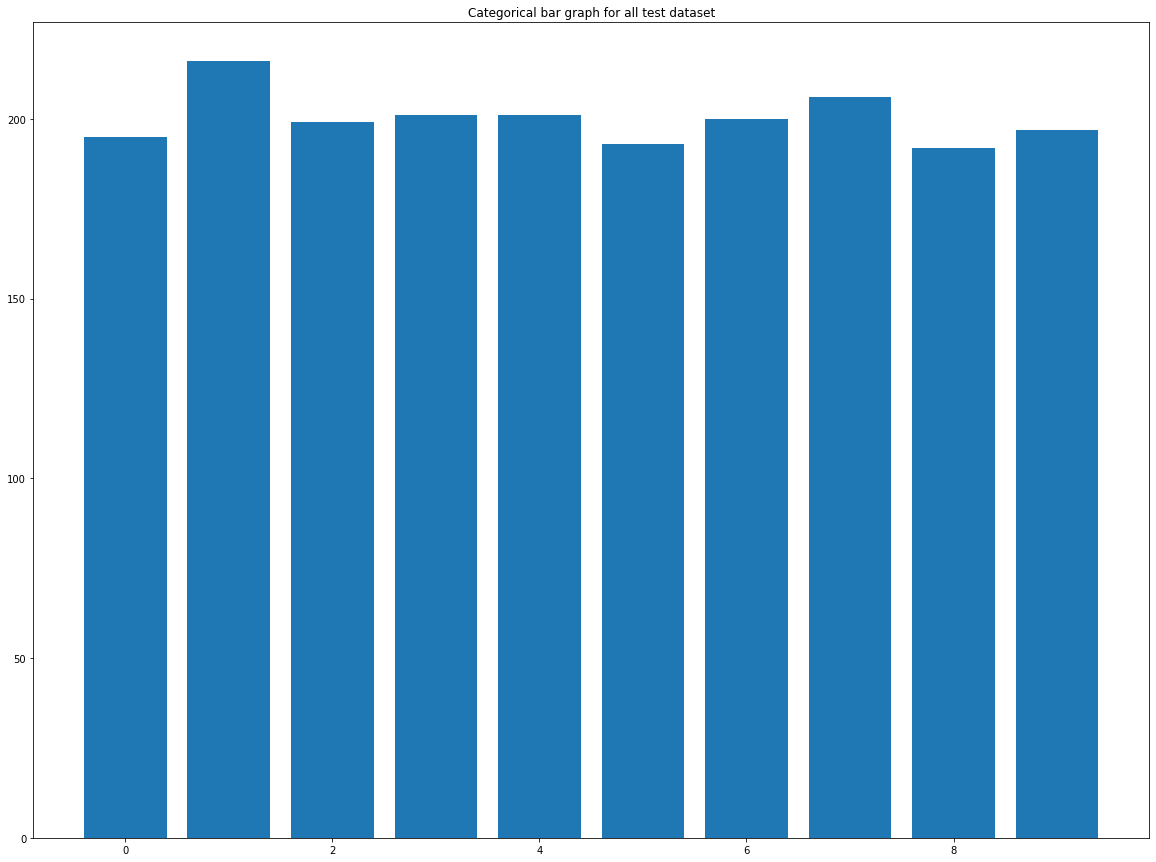

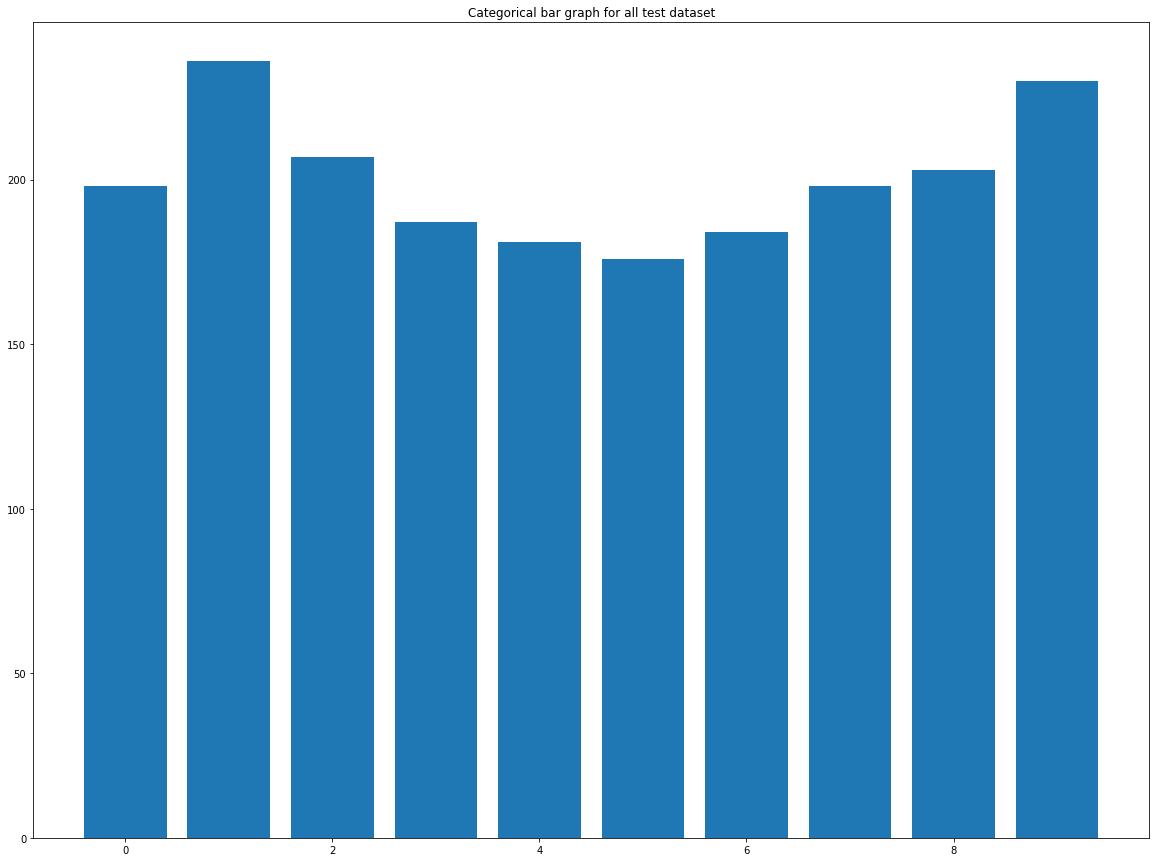

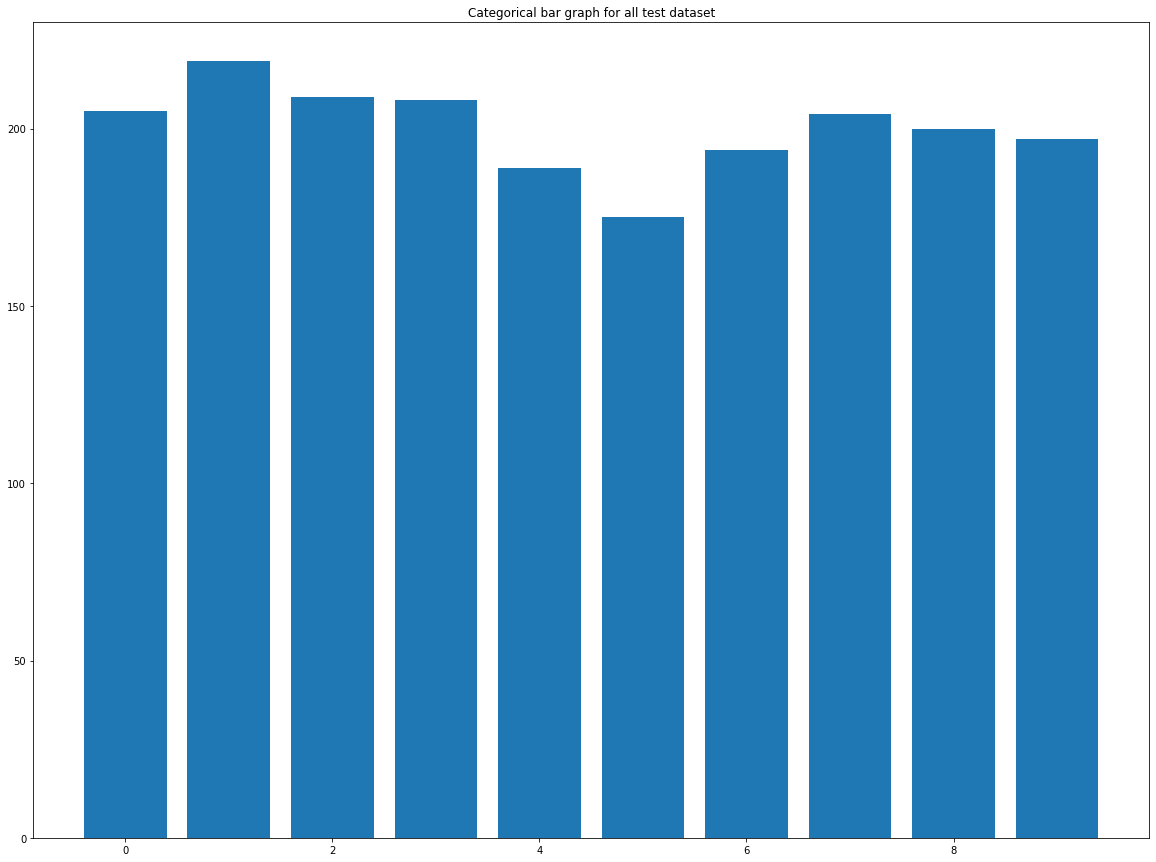

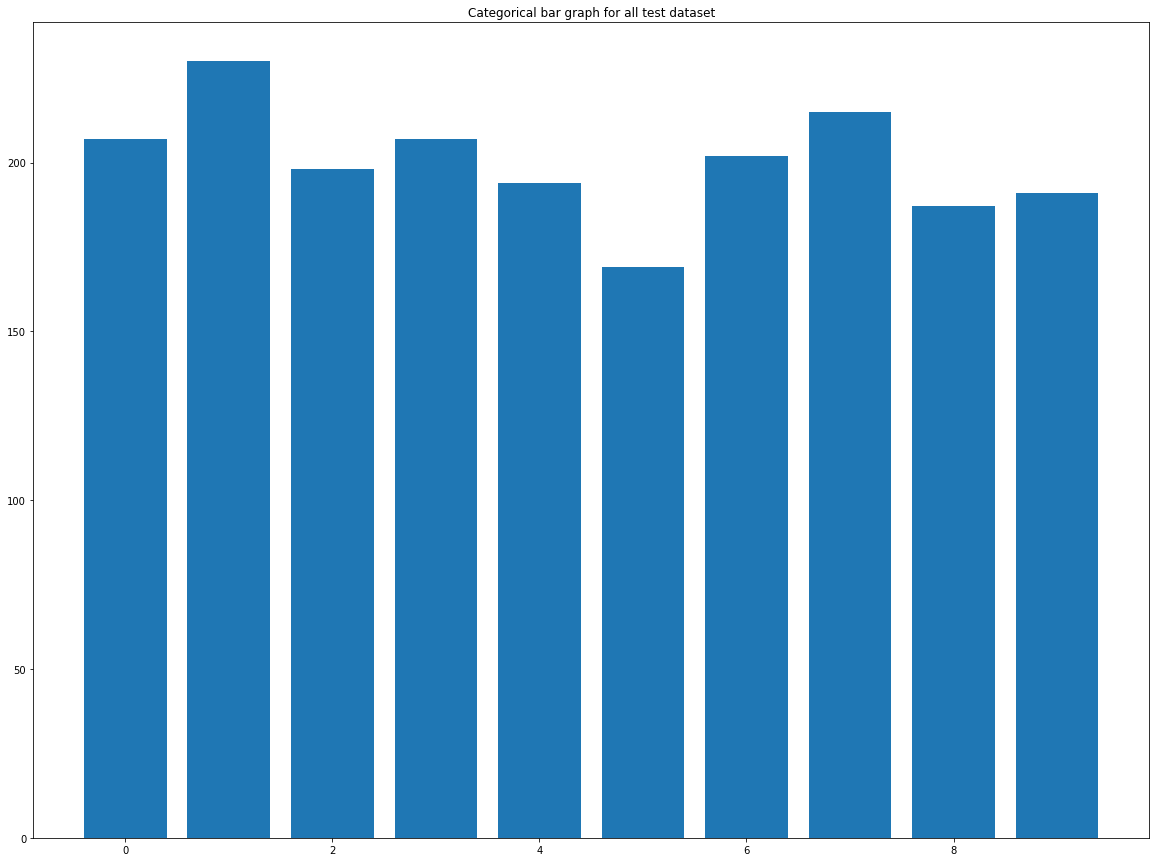

In [30]:
#Plot the categories to see if data is balanced in all test datasets
for i in range(data_chunks):
  unique, counts = np.unique(test_y_list[i], return_counts=True)
  plt.figure(figsize=(20, 15))
  plt.bar(unique , counts)
  plt.title('Categorical bar graph for all test dataset')
  plt.show()

In [31]:
#Creating a dictionary with dataframes as structure to hold all the testing datasets
df_dict_test = {}
for i in range(data_chunks):
  x_test = test_x_list[i]
  x_test = [y for x in x_test for y in x]
  x_test = np.array(x_test)
  y_test = test_y_list[i]
  df_dict_test['df{0}'.format(i)] = pd.DataFrame(x_test, columns=range(dim))
  df_dict_test['df{0}'.format(i)]['y'] = y_test
df_dict_test

{'df0':                 0           1           2  ...          43          44  y
 0     -332.271149  747.798523  -42.844742  ...  -32.793819 -163.856934  7
 1       20.696899 -955.584290 -152.716660  ...  141.747177    6.074630  2
 2     -946.026917 -430.843262   66.175140  ...  -83.623375   35.989109  1
 3     1233.907227  112.939575  253.808899  ...  -48.210590   11.017841  0
 4      189.278198  714.581787 -291.909424  ... -139.233749 -137.973541  4
 ...           ...         ...         ...  ...         ...         ... ..
 1995  1052.185059 -336.050293 -653.044312  ... -217.938873  -62.509972  0
 1996   353.185455  -22.950962 -180.958237  ... -131.891724  -90.790176  6
 1997  -195.664124 -741.250244 -815.553223  ... -257.403870  -97.074074  3
 1998  -283.666626  641.184448  -88.934631  ...   28.333199  -24.686066  9
 1999   157.017014  178.934479 -797.165039  ...  -15.451918  -45.749538  5
 
 [2000 rows x 46 columns],
 'df1':                0           1           2  ...          4

###**Getting feature importance for the test datasets**

In [32]:
#Getting the importance score for each test dataframe using SelectKBest method
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = range(dim)
scores_testdf = {}

for i in range(data_chunks):
  # Perform feature selection
  selector = SelectKBest(f_classif)
  new = selector.fit_transform(df_dict_test['df{0}'.format(i)][range(dim)], df_dict_test['df0']['y'])
  scores_testdf['df{0}'.format(i)] = {}
  for j in range(len(selector.scores_)):
    scores_testdf['df{0}'.format(i)][j] = selector.scores_[j]
scores_testdf

{'df0': {0: 317.4618,
  1: 363.93884,
  2: 77.64763,
  3: 144.95972,
  4: 142.12949,
  5: 79.34255,
  6: 100.4292,
  7: 95.42489,
  8: 23.223648,
  9: 19.09401,
  10: 31.733997,
  11: 22.718761,
  12: 31.375086,
  13: 18.613432,
  14: 26.76316,
  15: 42.47573,
  16: 21.389511,
  17: 16.60235,
  18: 36.775528,
  19: 33.978977,
  20: 28.869658,
  21: 8.083153,
  22: 16.478092,
  23: 12.251905,
  24: 11.927591,
  25: 13.908709,
  26: 15.977274,
  27: 6.0804367,
  28: 7.2536607,
  29: 5.128647,
  30: 8.041022,
  31: 4.832495,
  32: 3.3571098,
  33: 10.911815,
  34: 6.007652,
  35: 4.9627185,
  36: 2.1376066,
  37: 4.225845,
  38: 3.7675376,
  39: 1.640241,
  40: 5.984303,
  41: 6.5997686,
  42: 4.793545,
  43: 5.200858,
  44: 3.8923192},
 'df1': {0: 0.32651013,
  1: 0.42287934,
  2: 0.48707652,
  3: 2.8425617,
  4: 0.9313179,
  5: 1.0445253,
  6: 1.0267047,
  7: 0.60469717,
  8: 0.63305235,
  9: 1.0680923,
  10: 0.6632182,
  11: 0.5502276,
  12: 0.9261971,
  13: 1.1396662,
  14: 1.0066445,

In [33]:
#Using heapq library to find the keys with maximum score for each dataframe in descending order
import heapq

important_features_testdf = {}

for i in range(data_chunks):
  important_features_testdf['df{0}'.format(i)] = heapq.nlargest(dim, scores_testdf['df{0}'.format(i)], key=scores_testdf['df{0}'.format(i)].get)
important_features_testdf

{'df0': [1,
  0,
  3,
  4,
  6,
  7,
  5,
  2,
  15,
  18,
  19,
  10,
  12,
  20,
  14,
  8,
  11,
  16,
  9,
  13,
  17,
  22,
  26,
  25,
  23,
  24,
  33,
  21,
  30,
  28,
  41,
  27,
  34,
  40,
  43,
  29,
  35,
  31,
  42,
  37,
  44,
  38,
  32,
  36,
  39],
 'df1': [3,
  42,
  40,
  39,
  20,
  43,
  18,
  21,
  34,
  27,
  36,
  33,
  13,
  31,
  26,
  9,
  5,
  15,
  44,
  6,
  14,
  35,
  22,
  19,
  4,
  12,
  41,
  17,
  29,
  32,
  28,
  10,
  8,
  16,
  7,
  11,
  2,
  25,
  1,
  24,
  0,
  38,
  37,
  30,
  23],
 'df2': [34,
  26,
  21,
  12,
  0,
  9,
  37,
  19,
  6,
  40,
  15,
  7,
  32,
  42,
  31,
  36,
  8,
  4,
  38,
  5,
  18,
  11,
  17,
  10,
  24,
  20,
  16,
  41,
  27,
  23,
  22,
  25,
  13,
  35,
  14,
  33,
  29,
  43,
  39,
  1,
  44,
  3,
  30,
  28,
  2],
 'df3': [33,
  38,
  32,
  10,
  25,
  3,
  4,
  30,
  26,
  39,
  42,
  17,
  7,
  9,
  6,
  34,
  24,
  5,
  35,
  14,
  44,
  31,
  27,
  8,
  29,
  15,
  12,
  16,
  37,
  2,
  36,
  0,
  20,


In [34]:
#Getting the index value of importance of first column number in each train dataset
'''Here, the list represents that for the given column number in  the specific test dataset, 
the number in the first positions of the ouput list shows the importance position of the columns in model trained by first data chunk.
Similarly, the secoind position shows the index position of the specified column in the feature importance list of the second training datasets.''' 
train_index = {}
for i in range(data_chunks):
  number = important_features_testdf['df{0}'.format(i)][0]
  train_index['df{0}'.format(i)] = []
  for j in important_features_traindf.keys():
    train_index['df{0}'.format(i)].append(important_features_traindf[j].index(number))
train_index  

{'df0': [0, 0, 0, 0, 0],
 'df1': [2, 2, 2, 3, 2],
 'df2': [34, 40, 42, 40, 37],
 'df3': [24, 26, 23, 24, 24],
 'df4': [40, 38, 40, 39, 40]}

In [35]:
#Getting the model number for most and least bias model for each testdf
model_number = {}
for i in range(data_chunks):
  model_number['df{0}'.format(i)] = {}
  model_number['df{0}'.format(i)]['most_bias'] = train_index['df{0}'.format(i)].index(min(train_index['df{0}'.format(i)]))
  model_number['df{0}'.format(i)]['least_bias'] = train_index['df{0}'.format(i)].index(max(train_index['df{0}'.format(i)]))
  
model_number

{'df0': {'least_bias': 0, 'most_bias': 0},
 'df1': {'least_bias': 3, 'most_bias': 0},
 'df2': {'least_bias': 2, 'most_bias': 0},
 'df3': {'least_bias': 1, 'most_bias': 2},
 'df4': {'least_bias': 0, 'most_bias': 1}}

###**Making Predictions for each test dataset**

In [36]:
#Making predictions with most bias, least bias and combination of both the types of models
predictions = {}
for i in range(data_chunks):
  model_dict = model_number['df{0}'.format(i)]
  predictions['df{0}'.format(i)] = {}
  predictions['df{0}'.format(i)]['most_bias'] = nn_model_dict['model{0}'.format(model_dict['most_bias'])].predict(test_x_list[i])
  predictions['df{0}'.format(i)]['most_bias'] = np.argmax(predictions['df{0}'.format(i)]['most_bias'], axis=1)
  predictions['df{0}'.format(i)]['least_bias'] = nn_model_dict['model{0}'.format(model_dict['least_bias'])].predict(test_x_list[i])
  predictions['df{0}'.format(i)]['least_bias'] = np.argmax(predictions['df{0}'.format(i)]['least_bias'], axis=1)

  mb = nn_model_dict['model{0}'.format(model_dict['most_bias'])].predict(test_x_list[i])
  lb = nn_model_dict['model{0}'.format(model_dict['least_bias'])].predict(test_x_list[i])
  combined_sum = mb + lb
  combined_avg = (mb + lb)/2
  predictions['df{0}'.format(i)]['combined_sum'] = combined_sum
  predictions['df{0}'.format(i)]['combined_sum'] = np.argmax(predictions['df{0}'.format(i)]['combined_sum'], axis=1)
  predictions['df{0}'.format(i)]['combined_avg'] = combined_avg
  predictions['df{0}'.format(i)]['combined_avg'] = np.argmax(predictions['df{0}'.format(i)]['combined_avg'], axis=1)
predictions

{'df0': {'combined_avg': array([7, 2, 1, ..., 3, 9, 5]),
  'combined_sum': array([7, 2, 1, ..., 3, 9, 5]),
  'least_bias': array([7, 2, 1, ..., 3, 9, 5]),
  'most_bias': array([7, 2, 1, ..., 3, 9, 5])},
 'df1': {'combined_avg': array([6, 5, 6, ..., 7, 4, 9]),
  'combined_sum': array([6, 5, 6, ..., 7, 4, 9]),
  'least_bias': array([6, 5, 6, ..., 7, 4, 9]),
  'most_bias': array([6, 5, 6, ..., 9, 4, 9])},
 'df2': {'combined_avg': array([4, 4, 3, ..., 5, 1, 7]),
  'combined_sum': array([4, 4, 3, ..., 5, 1, 7]),
  'least_bias': array([4, 4, 3, ..., 5, 1, 7]),
  'most_bias': array([4, 4, 3, ..., 3, 1, 7])},
 'df3': {'combined_avg': array([9, 8, 6, ..., 5, 7, 8]),
  'combined_sum': array([9, 8, 6, ..., 5, 7, 8]),
  'least_bias': array([9, 8, 6, ..., 5, 7, 8]),
  'most_bias': array([9, 8, 6, ..., 5, 7, 8])},
 'df4': {'combined_avg': array([4, 9, 9, ..., 4, 5, 6]),
  'combined_sum': array([4, 9, 9, ..., 4, 5, 6]),
  'least_bias': array([4, 9, 9, ..., 4, 5, 6]),
  'most_bias': array([4, 9, 9, ..

In [37]:
#Printing all the metrics for all 5 test datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score


for i in range(data_chunks):
  print("All the values are considering the test dataset number {0}".format(i))
  lm = predictions['df{0}'.format(i)]['most_bias']
  ll = predictions['df{0}'.format(i)]['least_bias']
  lcs = predictions['df{0}'.format(i)]['combined_sum']
  lca = predictions['df{0}'.format(i)]['combined_avg']

  #Create confusion matrix for NN Model and calculating accuracy for most bias model
  nn_cm = confusion_matrix(test_y_list[i], lm)
  nn_accuracy = nn_cm.trace()/nn_cm.sum()
  print("Accuracy for most bias NN model : ", nn_accuracy)

  #Create confusion matrix for NN Model and calculating accuracy for least bias model
  nn_cm = confusion_matrix(test_y_list[i], ll)
  nn_accuracy = nn_cm.trace()/nn_cm.sum()
  print("Accuracy for least bias NN model : ", nn_accuracy)
  
  #Create confusion matrix for NN Model and calculating accuracy for sum combined model
  nn_cm = confusion_matrix(test_y_list[i], lcs)
  nn_accuracy = nn_cm.trace()/nn_cm.sum()
  print("Accuracy for sum combined NN model : ", nn_accuracy)

  #Create confusion matrix for NN Model and calculating accuracy for average combined model
  nn_cm = confusion_matrix(test_y_list[i], lca)
  nn_accuracy = nn_cm.trace()/nn_cm.sum()
  print("Accuracy for average combined NN model : ", nn_accuracy)

  print('\n\n\n')

  #Getting F1 micro score for most bias model
  nn_f1 = f1_score(test_y_list[i], lm, average = 'micro')
  print("F1 score (micro) for most bias NN model : ", nn_f1)

  #Getting F1 micro score for least bias model
  nn_f1 = f1_score(test_y_list[i], ll, average = 'micro')
  print("F1 score (micro) for least bias NN model : ", nn_f1)

  #Getting F1 micro score for sum combined model
  nn_f1 = f1_score(test_y_list[i], lcs, average = 'micro')
  print("F1 score (micro) for sum combined NN model : ", nn_f1)

  #Getting F1 micro score for average combined model
  nn_f1 = f1_score(test_y_list[i], lca, average = 'micro')
  print("F1 score (micro) for average combined NN model : ", nn_f1)

  print('\n\n\n')

  #Getting F1 macro score for most bias model
  nn_f1_ma = f1_score(test_y_list[i], lm, average = 'macro')
  print("F1 score (macro) for most bias NN model : ", nn_f1_ma)

  #Getting F1 macro score for combined model
  nn_f1_ma = f1_score(test_y_list[i], ll, average = 'macro')
  print("F1 score (macro) for least bias NN model : ", nn_f1_ma)

  #Getting F1 macro score for sum combined model
  nn_f1_ma = f1_score(test_y_list[i], lcs, average = 'macro')
  print("F1 score (macro) for sum combined NN model : ", nn_f1_ma)

  #Getting F1 macro score for average combined model
  nn_f1_ma = f1_score(test_y_list[i], lca, average = 'macro')
  print("F1 score (macro) for average combined NN model : ", nn_f1_ma)

  print('\n\n\n')

  #Converting the most bias model predictions and actual labels to one hot vectors
  test_y_preds = to_categorical(test_y_list[i])
  pred_categorical = to_categorical(lm)
  nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
  print("AUC Score of most bias NN Model:",nn_auc)

  #Converting the least bias model predictions and actual labels to one hot vectors
  test_y_preds = to_categorical(test_y_list[i])
  pred_categorical = to_categorical(ll)
  nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
  print("AUC Score of least bias NN Model:",nn_auc)

  #Converting the sum combined model predictions and actual labels to one hot vectors
  test_y_preds = to_categorical(test_y_list[i])
  pred_categorical = to_categorical(lcs)
  nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
  print("AUC Score of sum combined NN Model:",nn_auc)
  
  #Converting the average combined model predictions and actual labels to one hot vectors
  test_y_preds = to_categorical(test_y_list[i])
  pred_categorical = to_categorical(lca)
  nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
  print("AUC Score of average combined NN Model:",nn_auc)

  print('\n\n\n\n\n\n')


All the values are considering the test dataset number 0
Accuracy for most bias NN model :  0.9045
Accuracy for least bias NN model :  0.9045
Accuracy for sum combined NN model :  0.9045
Accuracy for average combined NN model :  0.9045




F1 score (micro) for most bias NN model :  0.9045
F1 score (micro) for least bias NN model :  0.9045
F1 score (micro) for sum combined NN model :  0.9045
F1 score (micro) for average combined NN model :  0.9045




F1 score (macro) for most bias NN model :  0.9040718238915092
F1 score (macro) for least bias NN model :  0.9040718238915092
F1 score (macro) for sum combined NN model :  0.9040718238915092
F1 score (macro) for average combined NN model :  0.9040718238915092




AUC Score of most bias NN Model: 0.9462421058827797
AUC Score of least bias NN Model: 0.9462421058827797
AUC Score of sum combined NN Model: 0.9462421058827797
AUC Score of average combined NN Model: 0.9462421058827797







All the values are considering the test dataset number 1

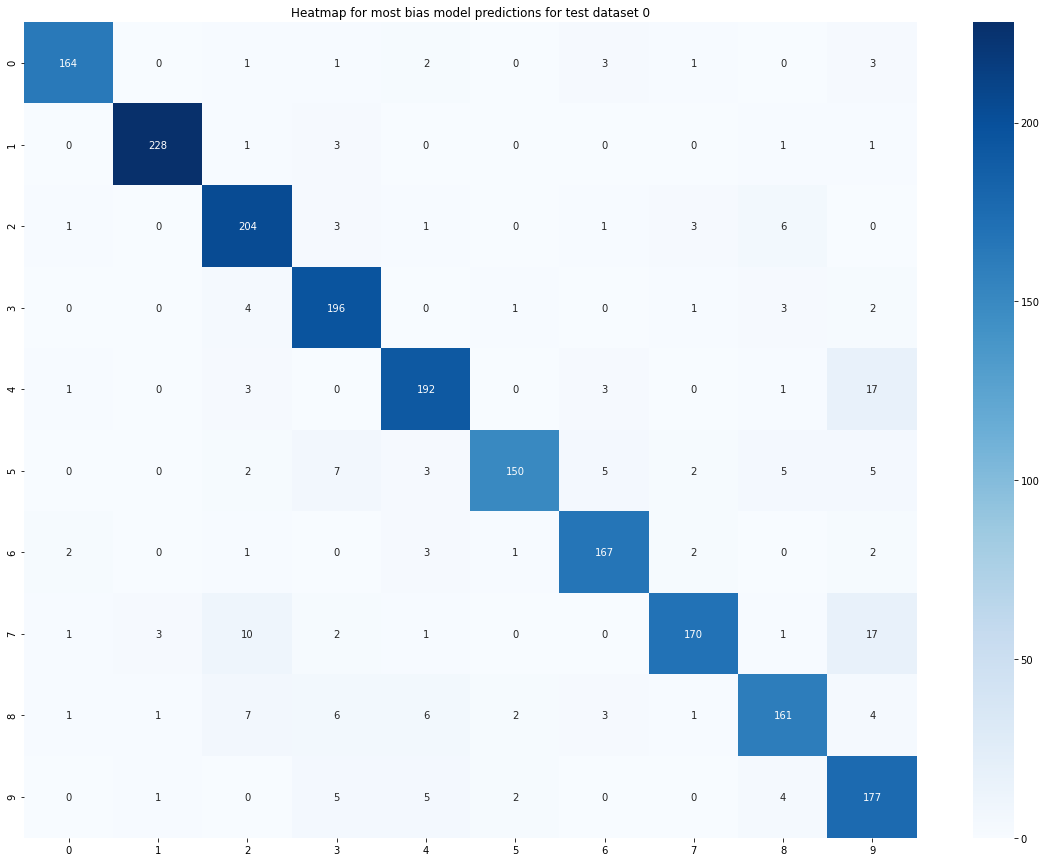

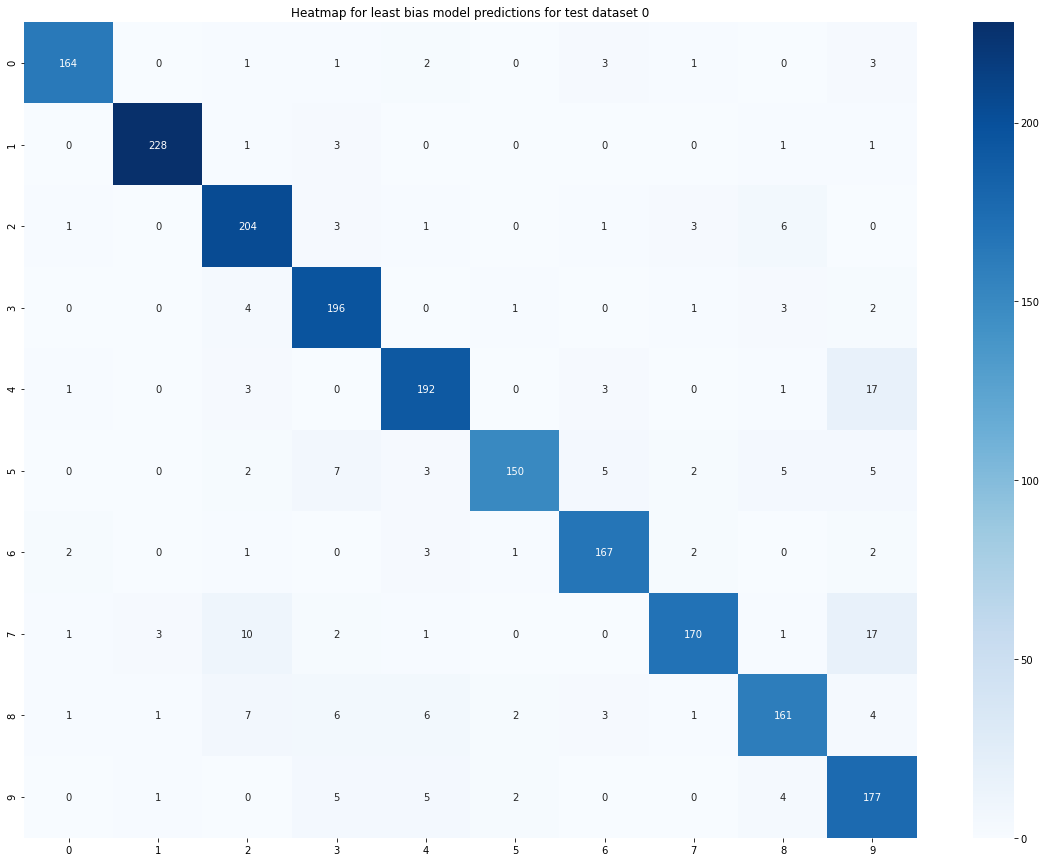

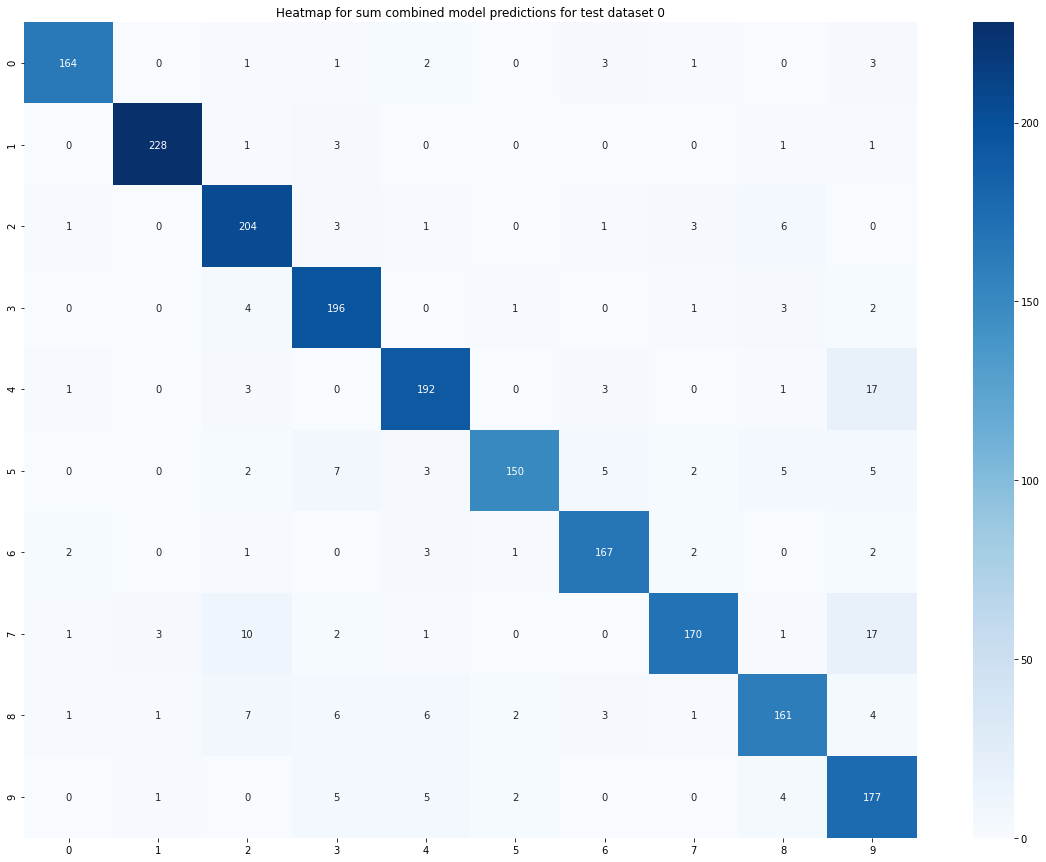

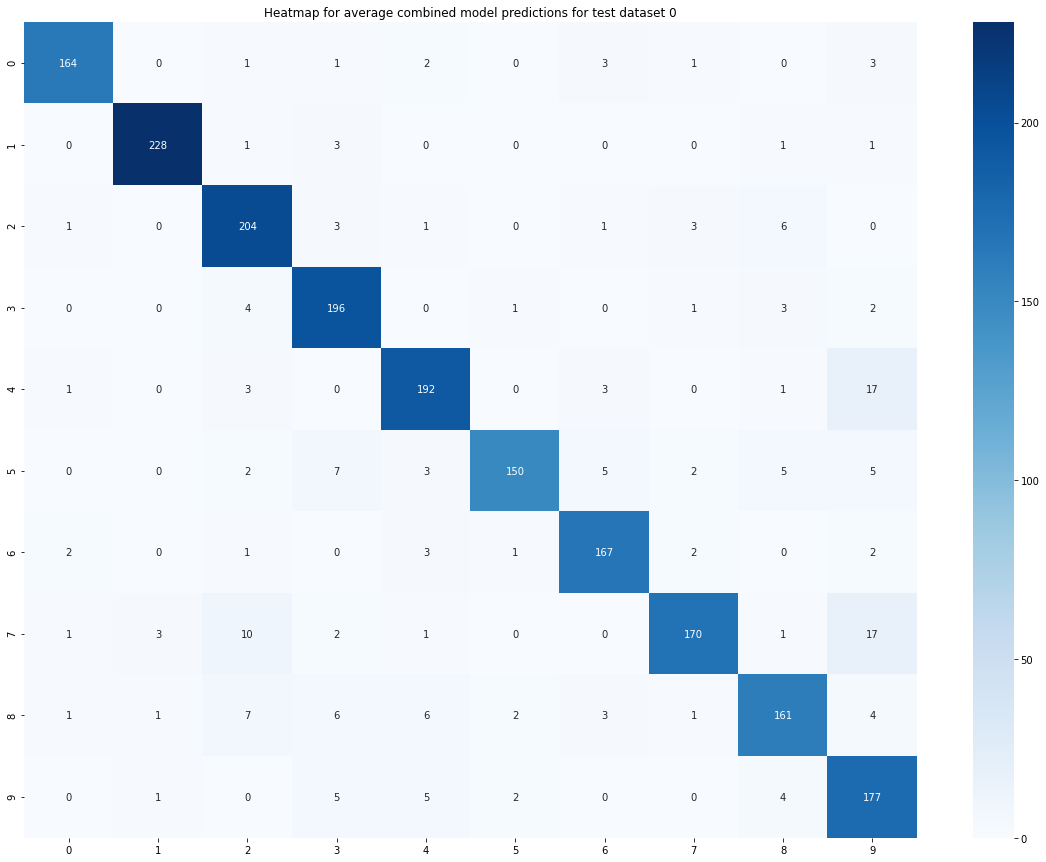

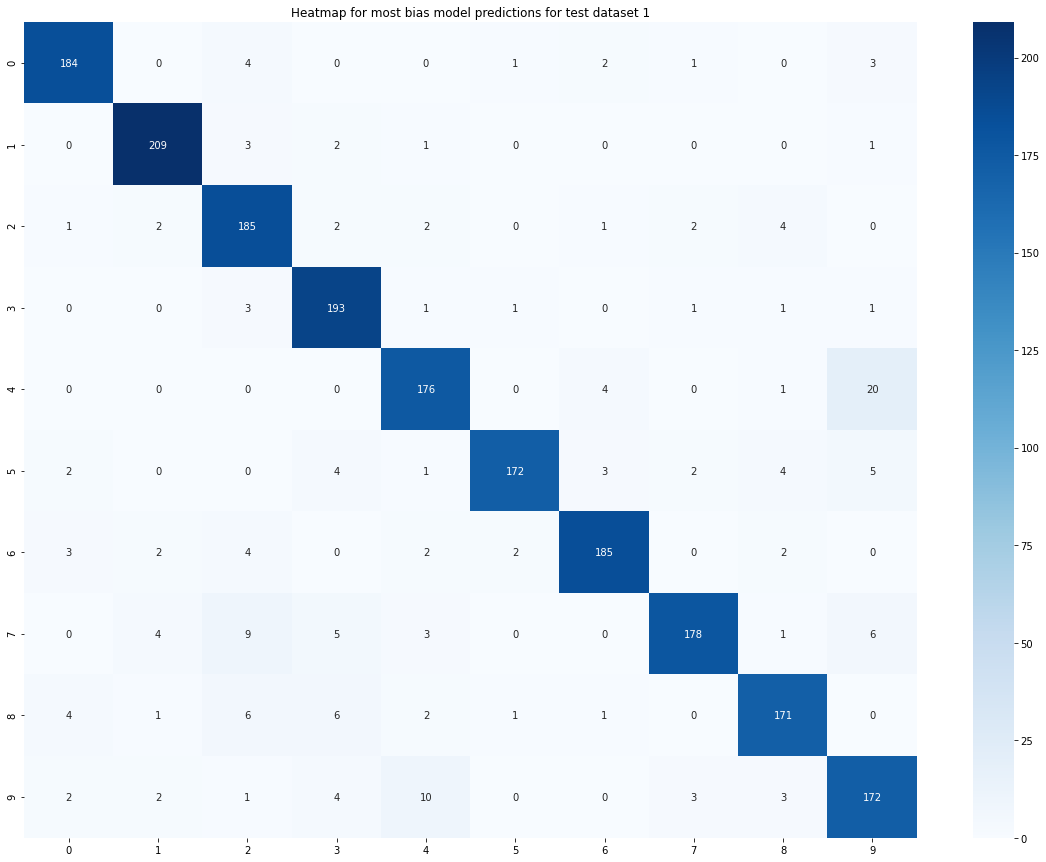

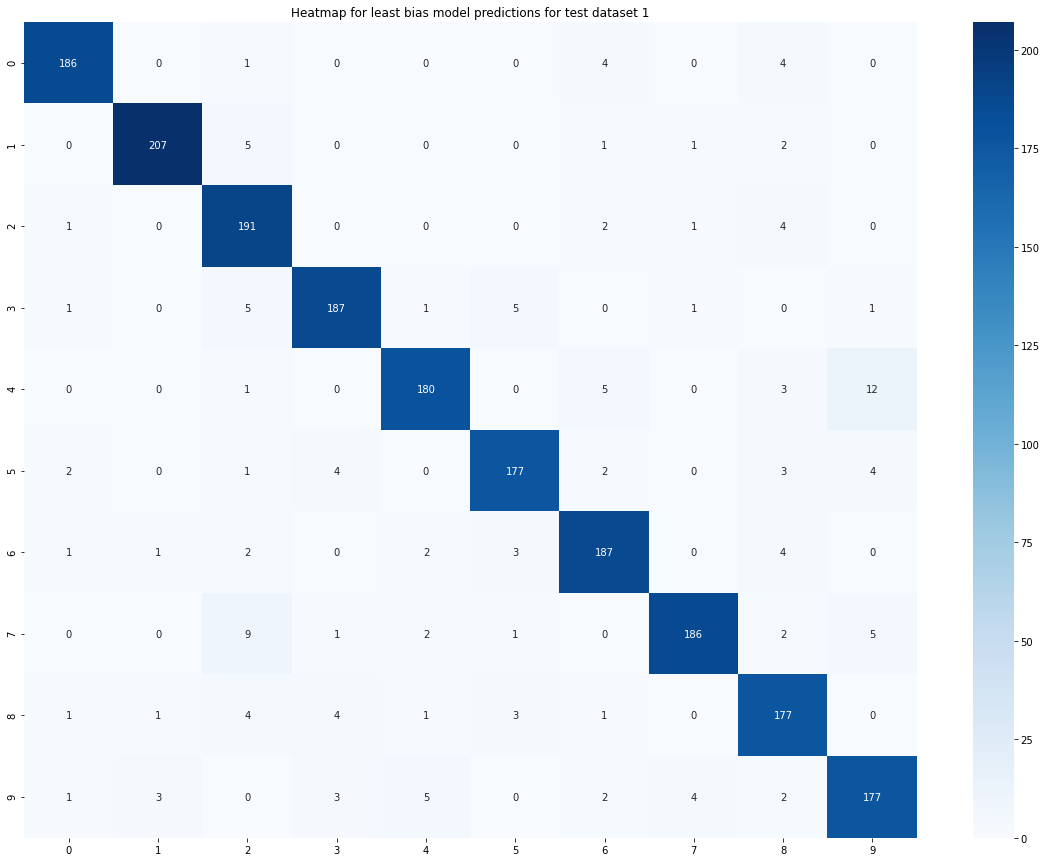

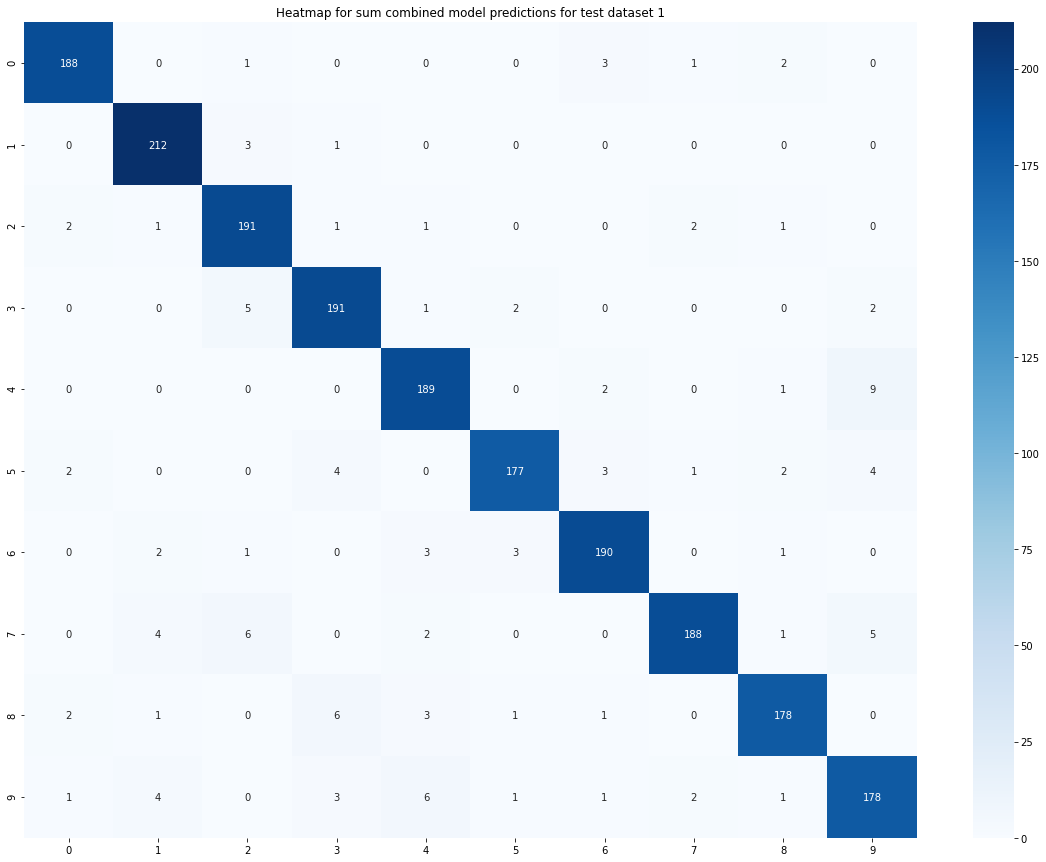

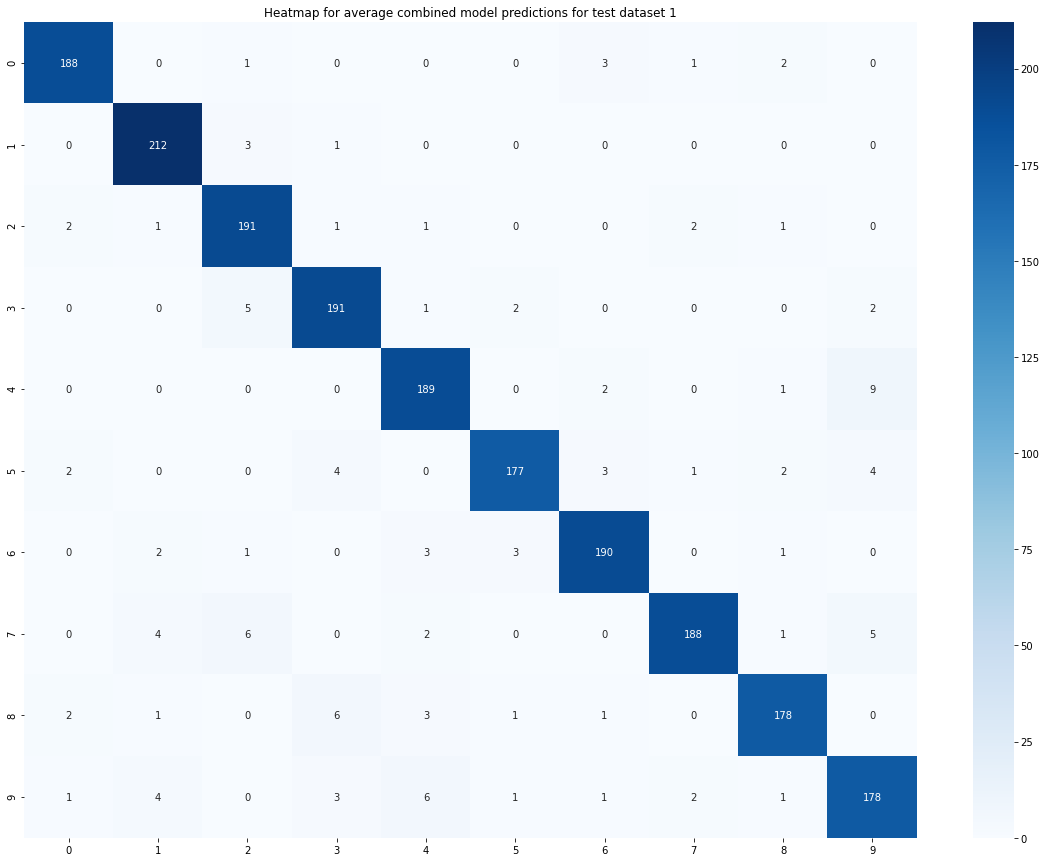

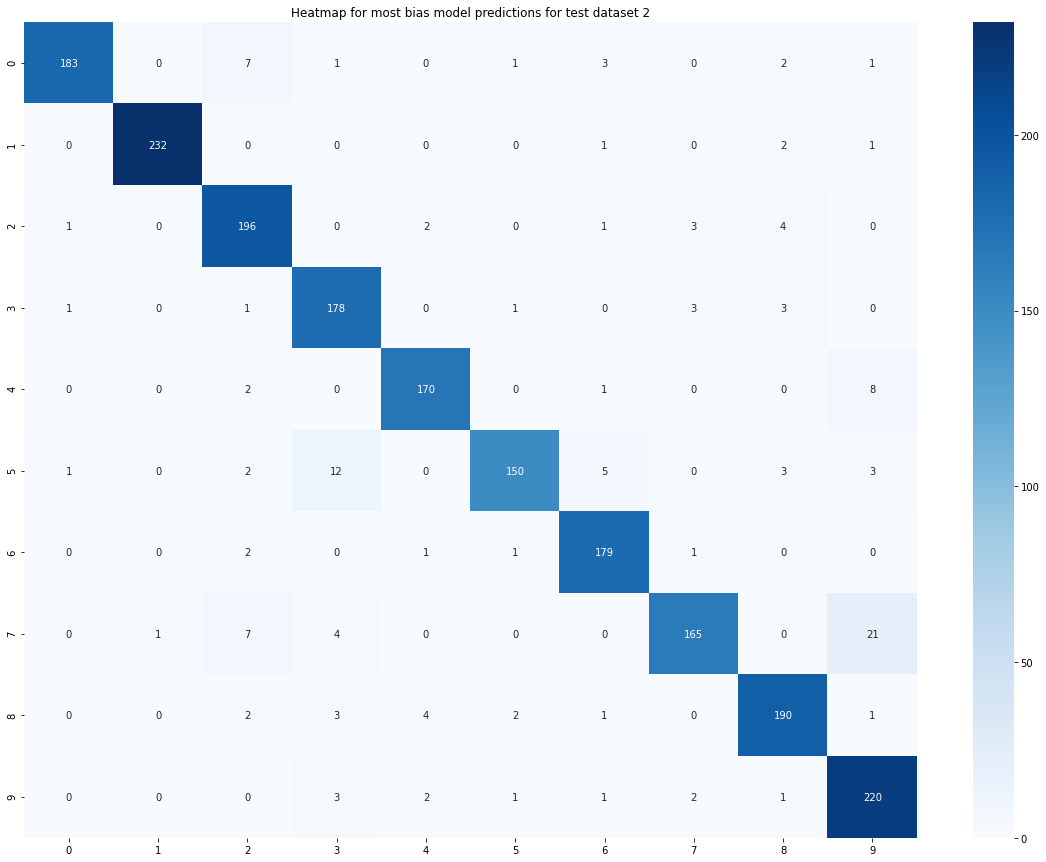

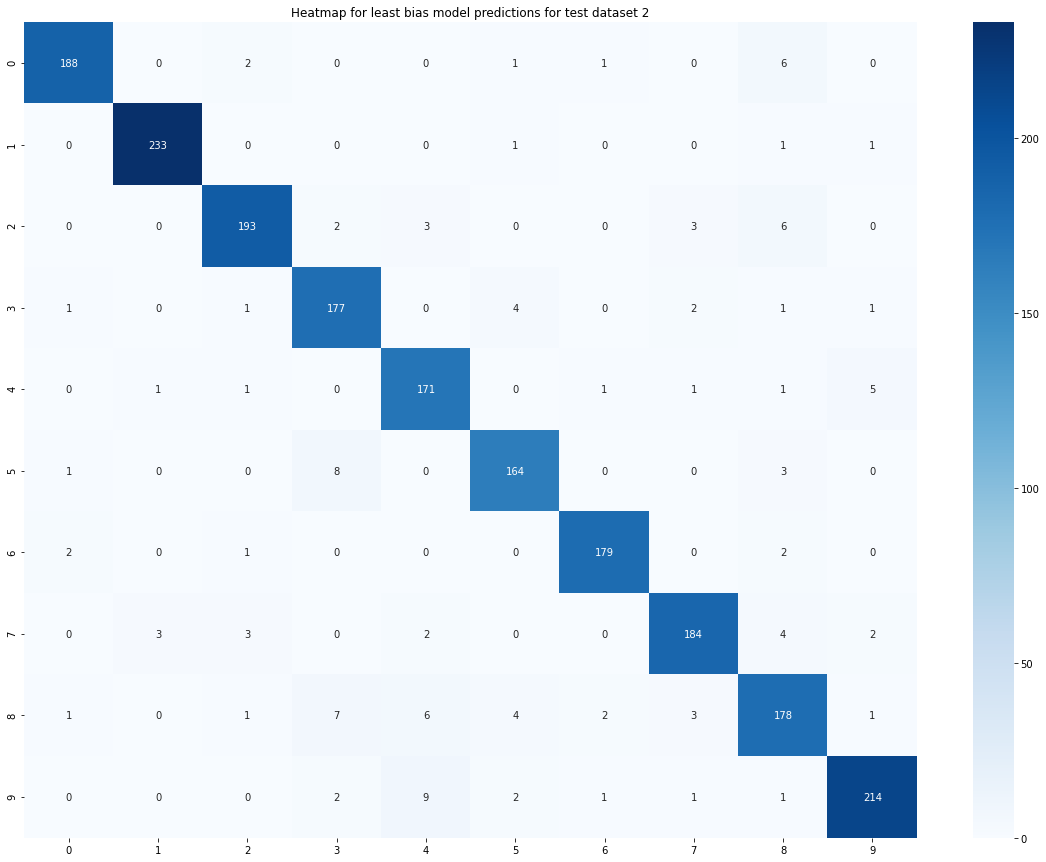

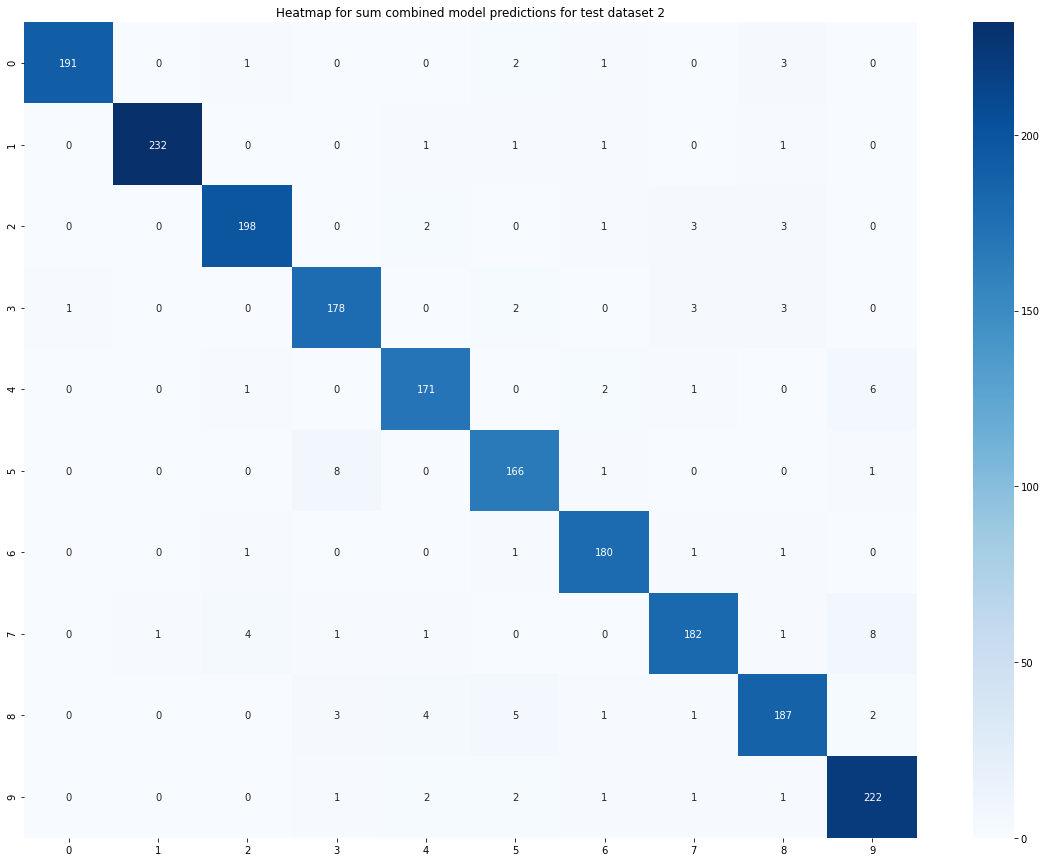

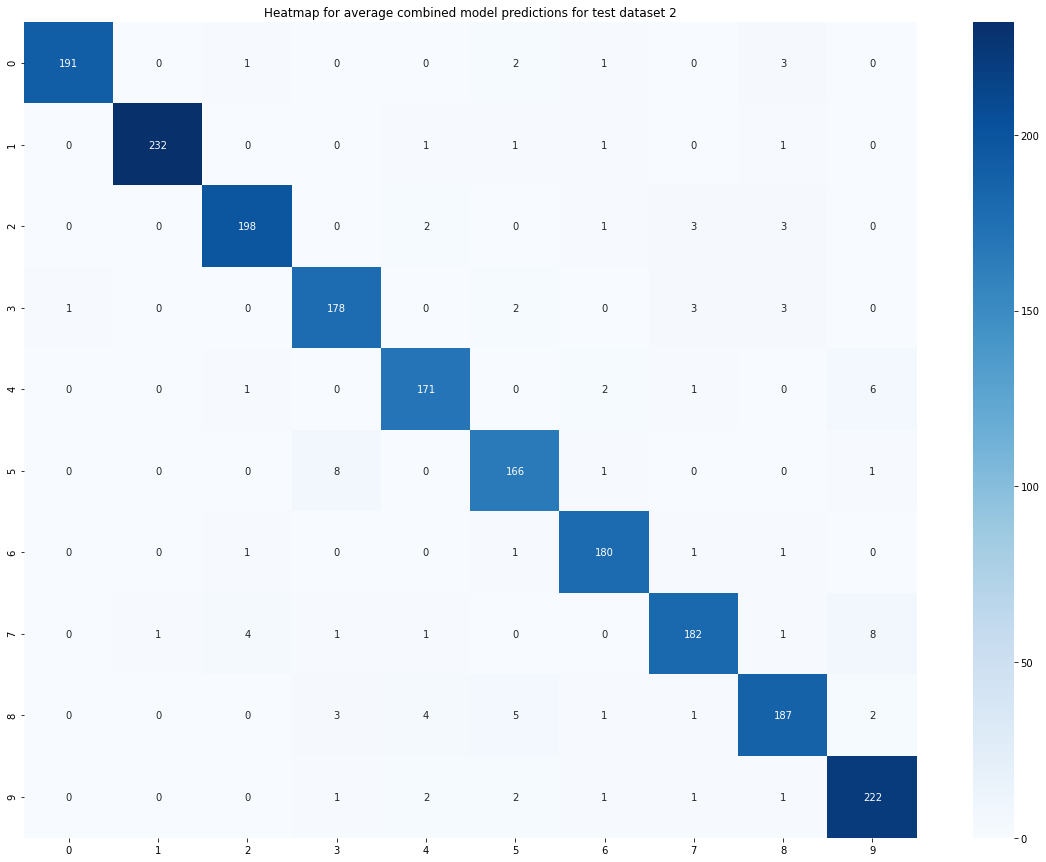

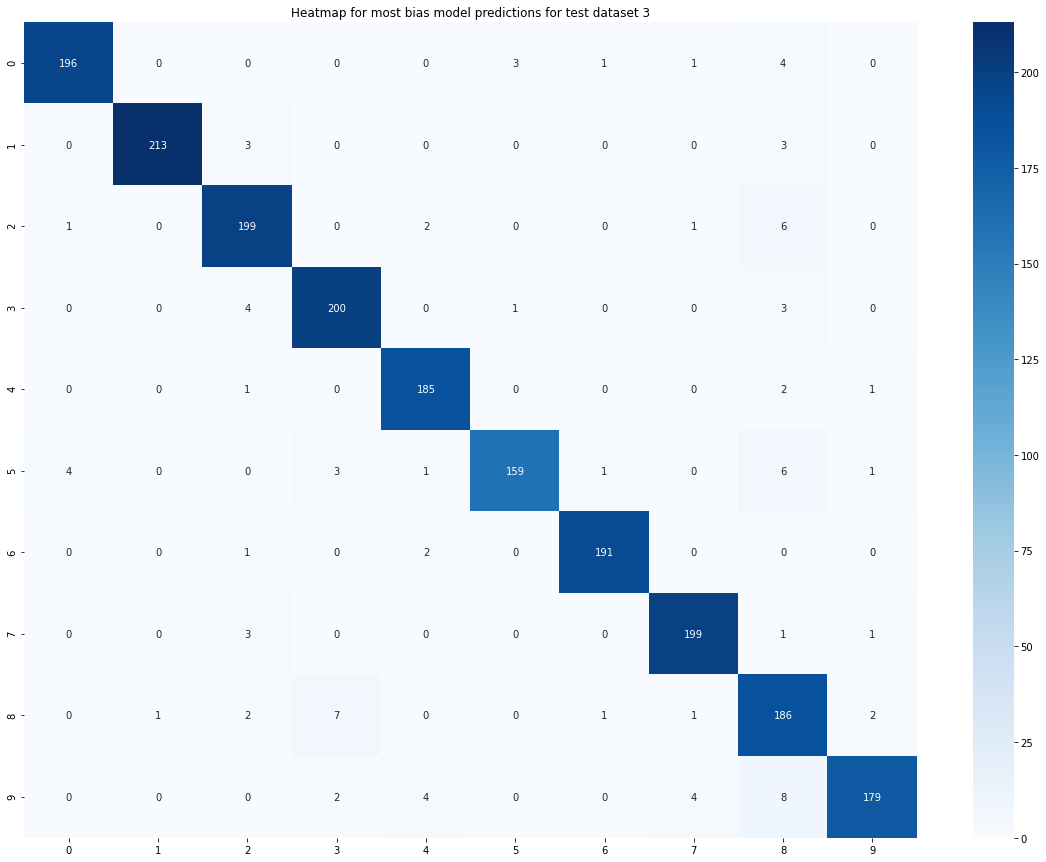

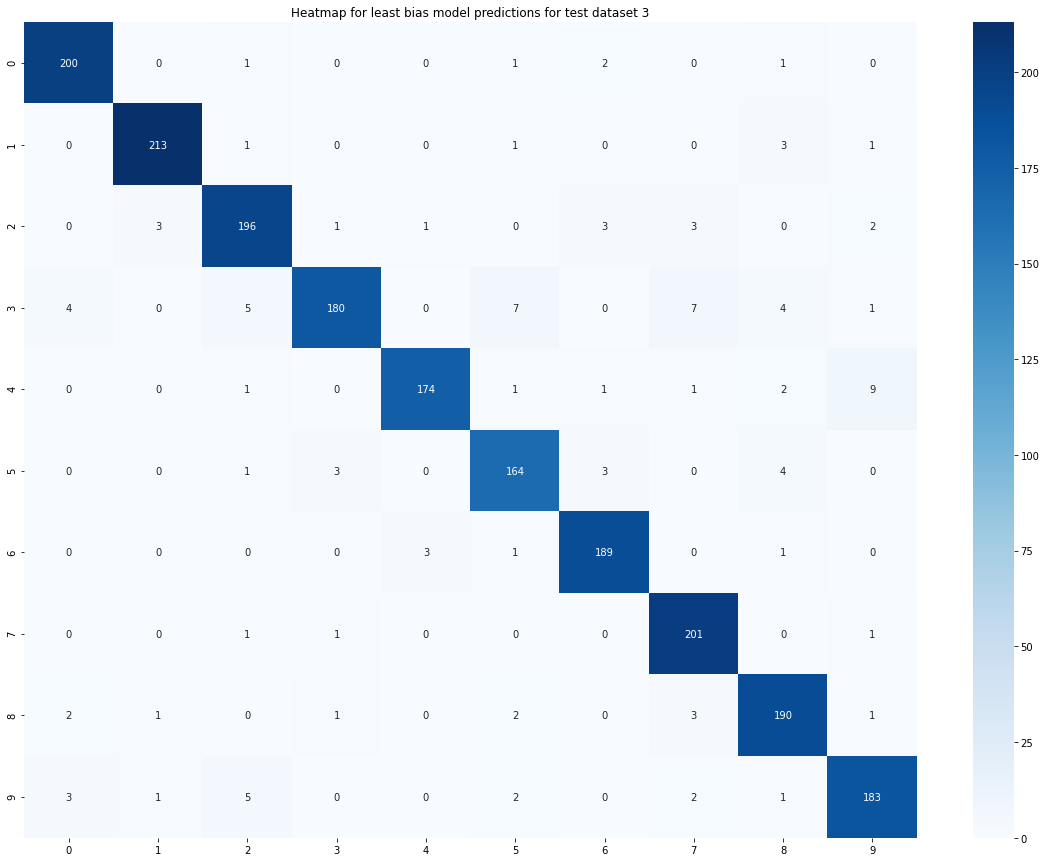

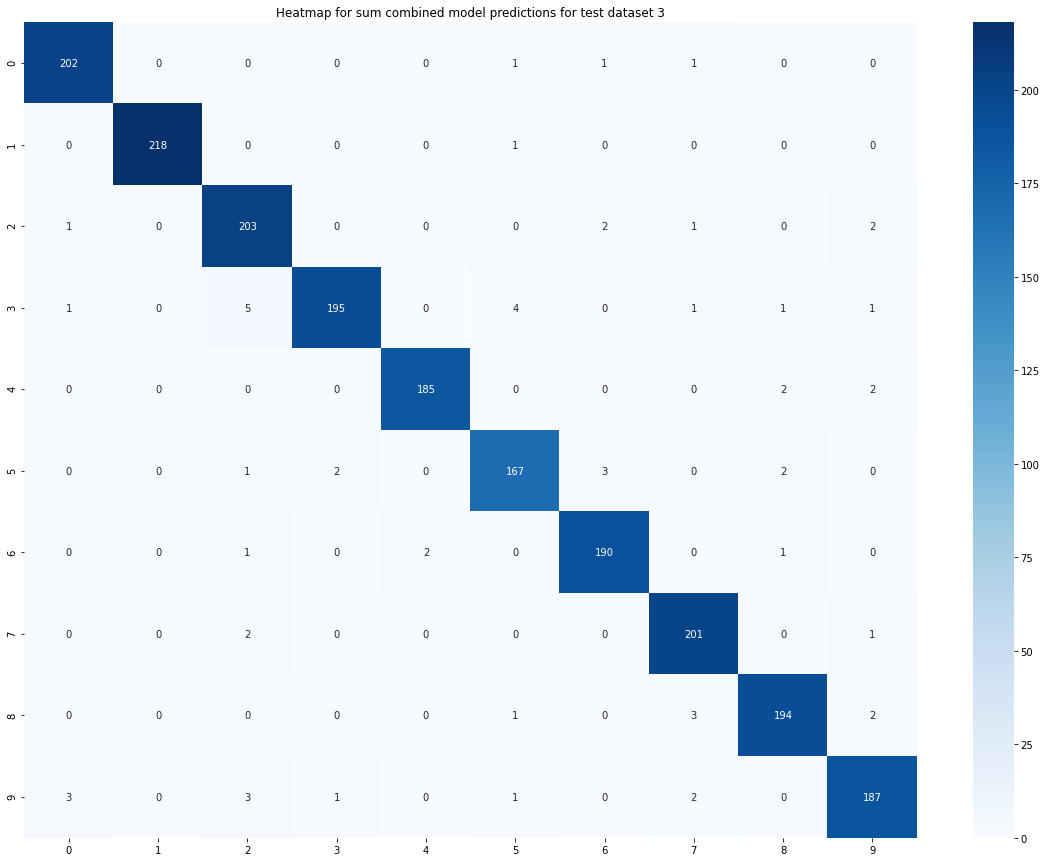

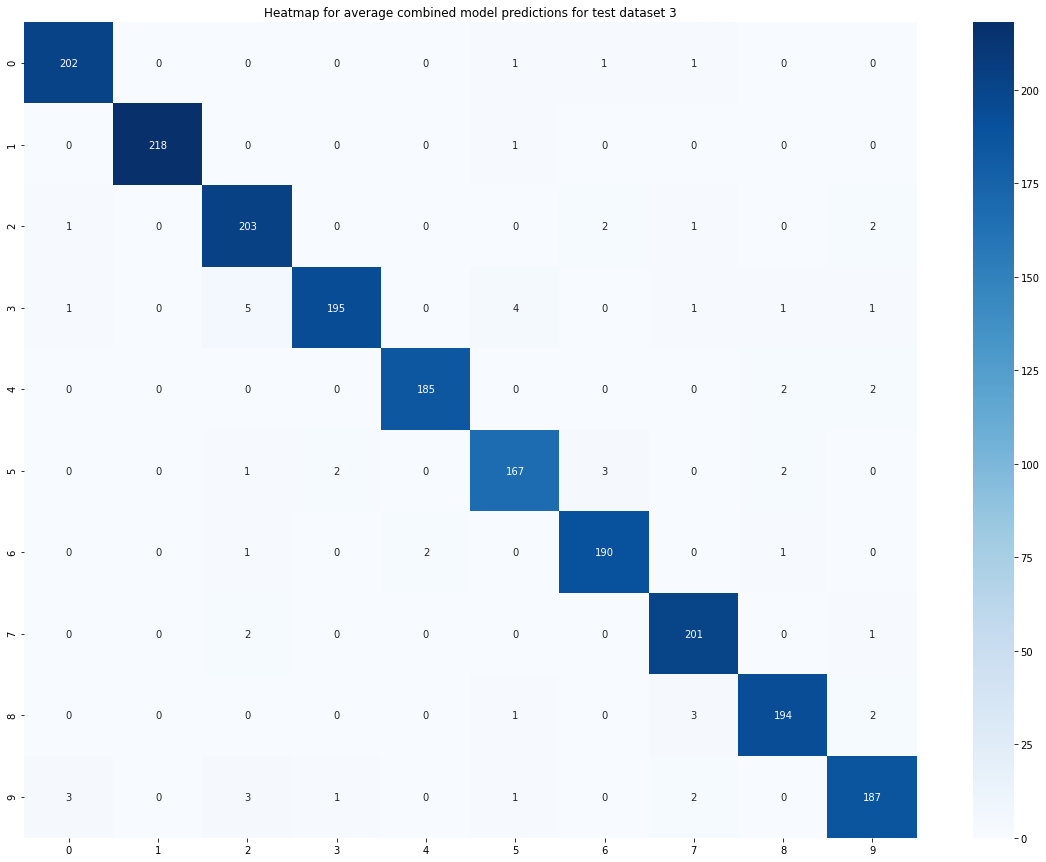

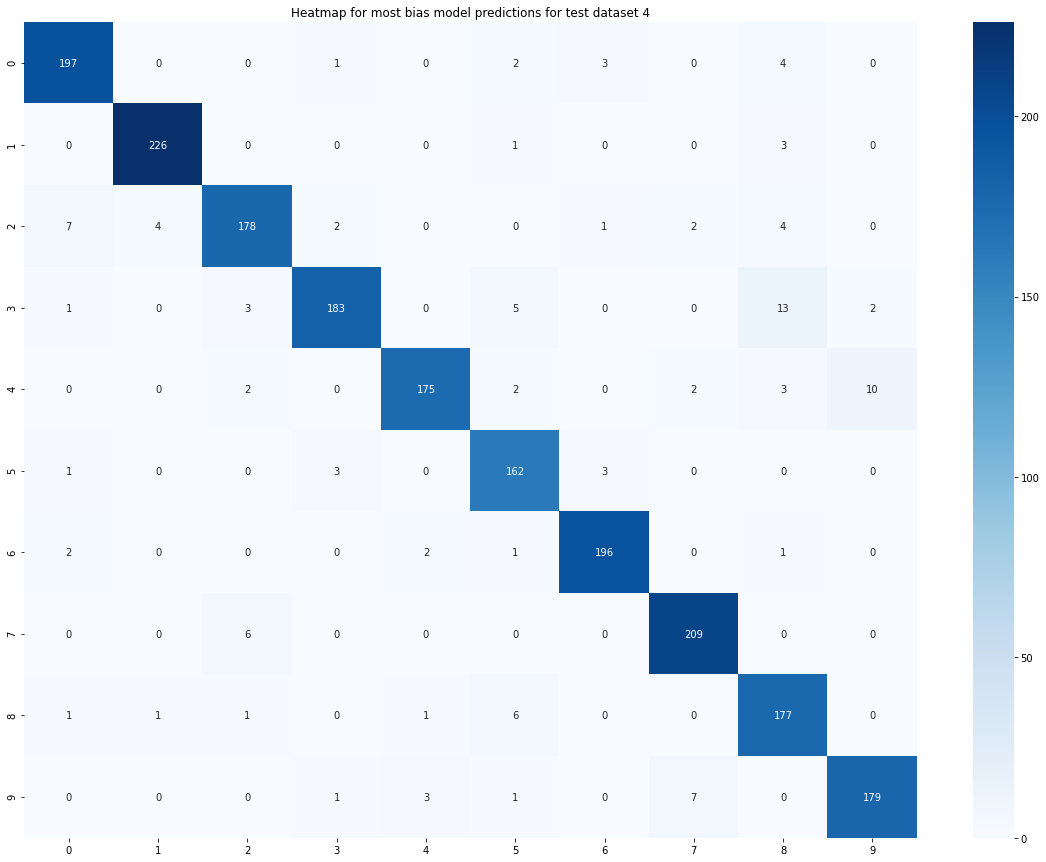

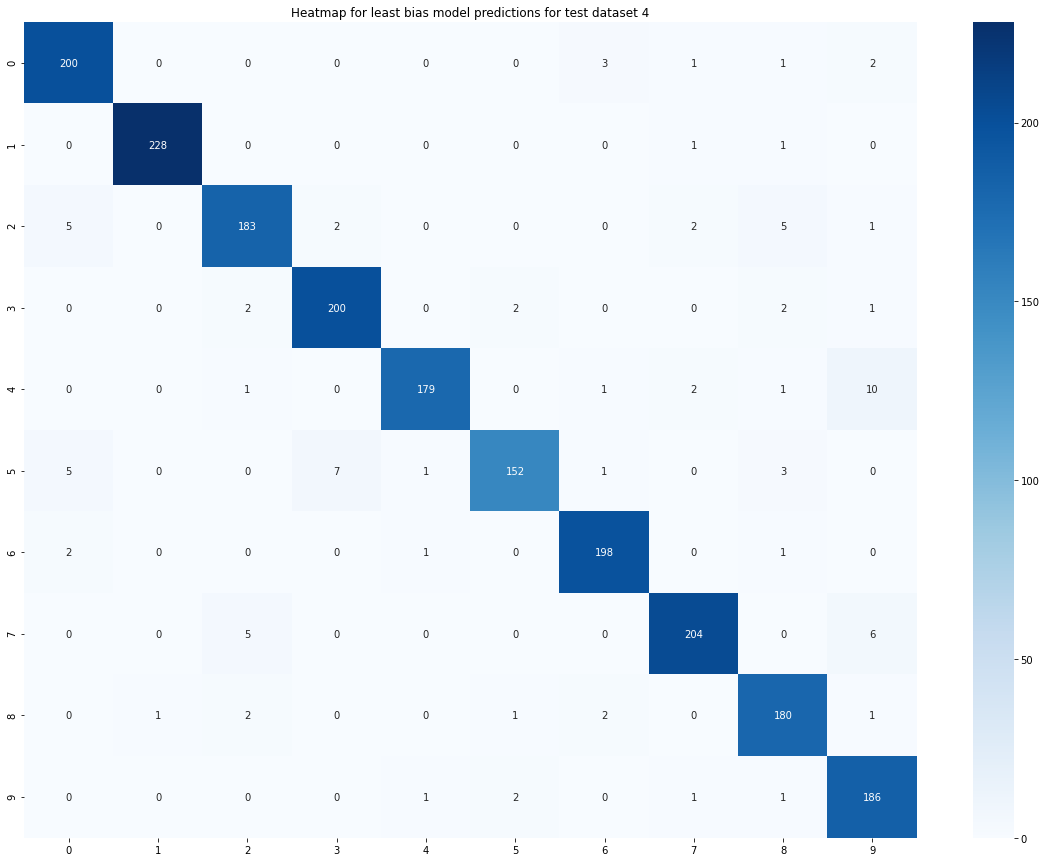

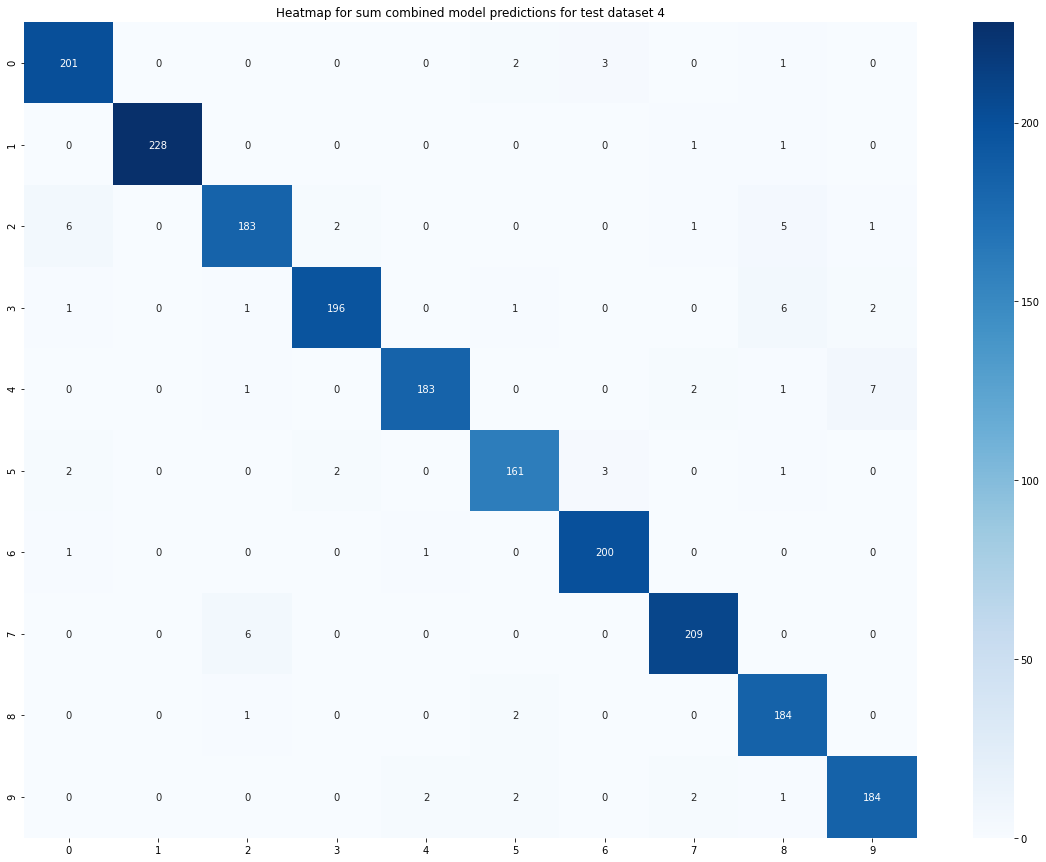

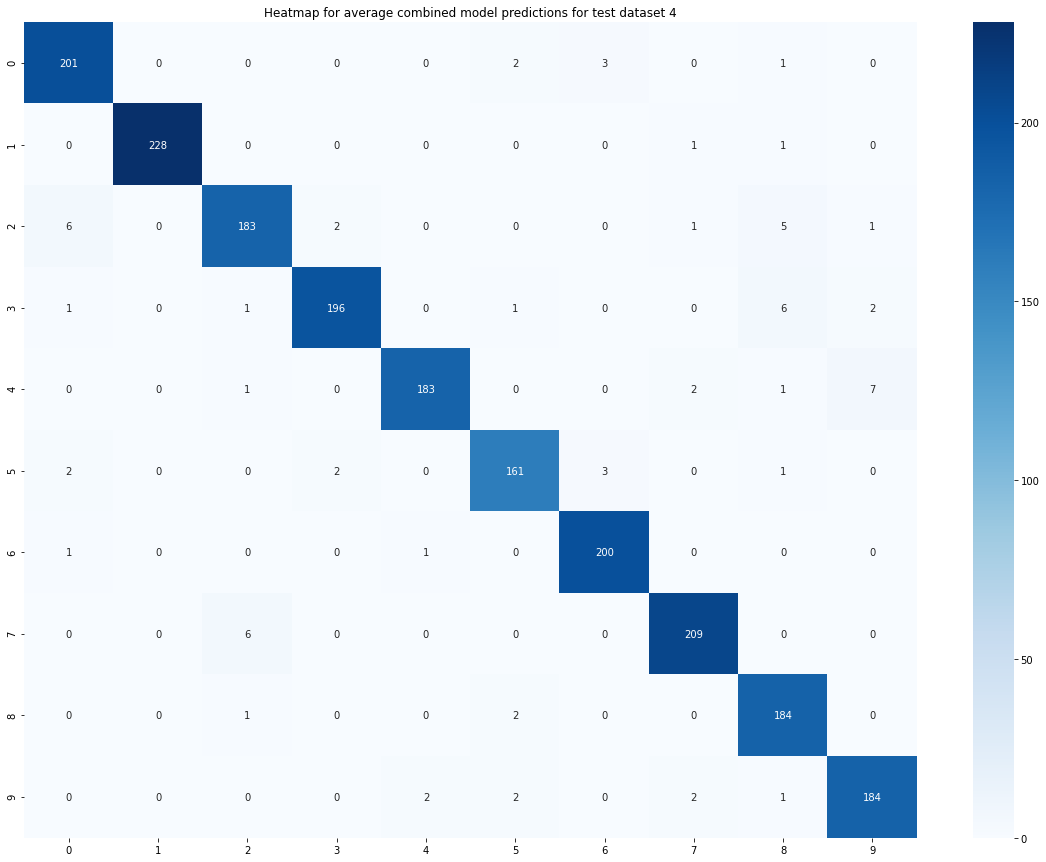

In [38]:
#Printing confusion matrix of the test datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns

for i in range(data_chunks):
  lm = predictions['df{0}'.format(i)]['most_bias']
  ll = predictions['df{0}'.format(i)]['least_bias']
  lcs = predictions['df{0}'.format(i)]['combined_sum']
  lca = predictions['df{0}'.format(i)]['combined_avg']

  #Create confusion matrix for NN Model and calculating accuracy for most bias model
  nn_cm = confusion_matrix(test_y_list[i], lm)
  plt.figure(figsize=(20, 15))
  axis = plt.subplot(111)
  sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
  axis.set_title('Heatmap for most bias model predictions for test dataset {0}'.format(i))

  #Create confusion matrix for NN Model and calculating accuracy for least bias model
  nn_cm = confusion_matrix(test_y_list[i], ll)
  plt.figure(figsize=(20, 15))
  axis = plt.subplot(111)
  sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
  axis.set_title('Heatmap for least bias model predictions for test dataset {0}'.format(i))


  #Create confusion matrix for NN Model and calculating accuracy for sum combined model
  nn_cm = confusion_matrix(test_y_list[i], lcs)
  plt.figure(figsize=(20, 15))
  axis = plt.subplot(111)
  sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
  axis.set_title('Heatmap for sum combined model predictions for test dataset {0}'.format(i))

  #Create confusion matrix for NN Model and calculating accuracy for average combined model
  nn_cm = confusion_matrix(test_y_list[i], lca)
  plt.figure(figsize=(20, 15))
  axis = plt.subplot(111)
  sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
  axis.set_title('Heatmap for average combined model predictions for test dataset {0}'.format(i))

###**Testing the feature importance for full test daatsset with 10000 images and test it with the most and least bias models**

In [39]:
#Converting the full test dataset to dataframe
x_test_full = test_x_flat
x_test_full = [y for x in x_test_full for y in x]
x_test_full = np.array(x_test_full)
y_test_full = test_y
df_dict_test_full = pd.DataFrame(x_test_full, columns=range(dim))
df_dict_test_full['y'] = y_test_full
df_dict_test_full

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,y
0,-332.271149,747.798523,-42.844742,-311.174255,-495.361633,242.371674,392.906403,470.744873,-399.246643,-186.128845,194.883926,-110.457214,33.541466,-220.144775,-138.025772,-80.079254,290.480225,255.323425,72.276924,57.204903,-53.120361,245.093414,51.535034,-82.404739,-128.202393,-40.848328,135.621613,-28.611893,18.886711,-212.604919,78.700768,-296.027771,82.175919,-154.090424,-24.374992,173.730484,-93.185310,-105.772339,37.196198,78.164810,-290.482269,76.322083,107.640900,-32.793819,-163.856934,7
1,20.696899,-955.584290,-152.716660,398.677094,-50.965942,-470.452515,279.351074,231.402496,147.144531,-87.240288,189.290192,33.331223,-2.019949,-831.919800,-9.992233,448.376556,566.166626,-1.532791,24.622952,-95.286903,407.707458,292.081085,68.934975,247.311920,-138.835571,-282.400635,53.415661,-3.788742,29.439926,-57.813202,78.791641,123.775932,-37.553795,65.638580,97.438690,-41.802139,-33.913147,97.323349,25.771309,-58.689766,37.893517,-231.552887,-218.175644,141.747177,6.074630,2
2,-946.026917,-430.843262,66.175140,260.102966,-534.093872,87.884674,-24.016973,-109.968018,98.752808,-135.803146,-57.897682,-83.658928,-178.423218,304.941742,-305.102722,44.335304,12.935150,-37.227757,-70.196564,-28.322540,17.421875,66.143280,36.573311,65.185516,2.928429,19.439613,200.017960,-14.498940,11.262201,-202.033600,-85.006058,-67.603912,88.582359,-48.129845,-94.923492,-135.864609,106.698692,-48.800060,-15.320215,-63.937065,-22.975880,-12.622998,76.418053,-83.623375,35.989109,1
3,1233.907227,112.939575,253.808899,-98.253326,-208.586517,-485.517731,695.602661,76.268768,21.424889,-52.396606,-520.906006,-233.135818,-86.816177,-113.459030,-379.125977,-46.681702,-147.874115,208.976044,-178.515289,-354.600586,67.445808,161.392288,104.594368,57.395260,-0.420273,310.727539,-174.699677,170.255432,-221.485657,150.853073,-159.893951,-48.133671,-58.248665,-102.557693,1.062584,45.221710,-204.456345,-93.527435,-20.844284,-185.793793,124.974091,124.241364,-9.747476,-48.210590,11.017841,0
4,189.278198,714.581787,-291.909424,631.328186,-149.397583,224.580383,-495.414917,236.949020,-341.270325,194.688232,138.200699,-211.722458,247.339096,135.106415,-278.547485,322.992920,-234.151108,-157.177292,-116.698914,-49.972481,41.704029,106.463806,-101.172676,399.434174,-302.204803,-100.351257,-187.159119,23.679794,98.022324,-104.136856,-162.474014,-68.615753,-30.325409,118.755882,-76.581169,-47.875519,-70.420403,-34.220093,-17.146027,99.406540,-117.771866,-55.651581,-7.300743,-139.233749,-137.973541,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,302.242523,-547.245361,-37.186340,269.367493,816.489868,951.125977,790.766479,235.802399,-565.940369,-37.610634,-144.609299,29.492050,-79.808853,70.938019,212.767120,249.873230,169.119034,-120.025810,318.629639,37.594482,69.363907,-274.008972,223.487061,156.980728,182.865753,-44.160240,-74.692795,-72.792137,-203.370560,195.893097,101.654022,-20.670040,112.110313,-176.503204,-212.377182,62.112991,176.589890,57.011997,265.221100,-33.396465,-133.280304,101.180412,-63.314903,53.969521,-91.922318,2
9996,575.698914,-692.075073,-820.005981,-192.085739,117.564110,-202.236740,681.432007,777.635132,-100.797821,-40.212509,170.988281,-90.219078,44.948204,220.908813,30.433022,-234.828110,-158.584457,44.101395,239.180023,-58.623756,521.376160,210.335663,-160.545670,32.926083,-151.344925,303.071320,-32.512138,212.838654,152.245712,153.582458,-202.366913,-92.325584,-13.039108,-68.297020,224.384964,-74.582214,148.440308,-6.058811,-48.645546,252.012268,-142.499283,-12.861420,13.613403,104.438858,-46.286400,3
9997,-270.187805,596.869690,355.112152,-414.954498,671.731873,162.863846,-42.199341,-352.593414,-24.631866,-802.657349,-172.868454,192.582550,-11.561188,207.697113,72.8334

In [40]:
#Getting feature importance list of the full test dataset
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = range(dim)
scores_testdf_full = {}

# Perform feature selection
selector = SelectKBest(f_classif)
new = selector.fit_transform(df_dict_test_full[range(dim)], df_dict_test_full['y'])
for j in range(len(selector.scores_)):
    scores_testdf_full[j] = selector.scores_[j]
scores_testdf_full

{0: 1623.9647,
 1: 2151.8547,
 2: 246.30832,
 3: 942.69135,
 4: 838.38684,
 5: 451.57788,
 6: 372.7244,
 7: 459.67813,
 8: 84.98211,
 9: 97.025375,
 10: 58.014877,
 11: 110.60824,
 12: 212.59789,
 13: 69.44894,
 14: 163.11168,
 15: 128.61122,
 16: 68.399124,
 17: 61.330822,
 18: 102.89218,
 19: 114.0749,
 20: 49.65457,
 21: 54.981094,
 22: 64.83169,
 23: 14.81515,
 24: 33.331158,
 25: 81.29664,
 26: 70.75069,
 27: 28.216028,
 28: 35.558132,
 29: 10.743192,
 30: 34.742027,
 31: 19.514406,
 32: 11.222827,
 33: 32.315422,
 34: 14.558443,
 35: 19.660069,
 36: 9.623905,
 37: 6.973606,
 38: 9.65556,
 39: 20.28213,
 40: 14.207613,
 41: 15.287426,
 42: 25.256279,
 43: 13.022961,
 44: 21.59446}

In [41]:
#Using heapq library to find the keys with maximum score for each dataframe in descending order
import heapq

important_features_testdf_full = heapq.nlargest(dim, scores_testdf_full, key=scores_testdf_full.get)
important_features_testdf_full

[1,
 0,
 3,
 4,
 7,
 5,
 6,
 2,
 12,
 14,
 15,
 19,
 11,
 18,
 9,
 8,
 25,
 26,
 13,
 16,
 22,
 17,
 10,
 21,
 20,
 28,
 30,
 24,
 33,
 27,
 42,
 44,
 39,
 35,
 31,
 41,
 23,
 34,
 40,
 43,
 32,
 29,
 38,
 36,
 37]

In [42]:
#Getting the index value of importance of first column number in full test dataset
train_index_full = []
number = important_features_testdf_full[0]
for j in important_features_traindf.keys():
  train_index_full.append(important_features_traindf[j].index(number))
train_index_full 

[0, 0, 0, 0, 0]

In [43]:
#Getting the model number for most and least bias model for full testdf
model_number_test_full = {}
model_number_test_full['most_bias'] = train_index_full.index(min(train_index_full))
model_number_test_full['least_bias'] = train_index_full.index(max(train_index_full))
  
model_number_test_full

{'least_bias': 0, 'most_bias': 0}

###**Making predictions for the full test dataset**

In [44]:
#Making predictions with most bias, least bias and both combined models
predictions_full = {}
model_dict = model_number_test_full
predictions_full['most_bias'] = nn_model_dict['model{0}'.format(model_dict['most_bias'])].predict(test_x_flat)
predictions_full['most_bias'] = np.argmax(predictions_full['most_bias'], axis=1)
predictions_full['least_bias'] = nn_model_dict['model{0}'.format(model_dict['least_bias'])].predict(test_x_flat)
predictions_full['least_bias'] = np.argmax(predictions_full['least_bias'], axis=1)

mb = nn_model_dict['model{0}'.format(model_dict['most_bias'])].predict(test_x_flat)
lb = nn_model_dict['model{0}'.format(model_dict['least_bias'])].predict(test_x_flat)
combined_sum = mb + lb
combined_avg = (mb + lb)/2
predictions_full['combined_sum'] = combined_sum
predictions_full['combined_sum'] = np.argmax(predictions_full['combined_sum'], axis=1)
predictions_full['combined_avg'] = combined_avg
predictions_full['combined_avg'] = np.argmax(predictions_full['combined_avg'], axis=1)
predictions_full

{'combined_avg': array([7, 2, 1, ..., 4, 5, 6]),
 'combined_sum': array([7, 2, 1, ..., 4, 5, 6]),
 'least_bias': array([7, 2, 1, ..., 4, 5, 6]),
 'most_bias': array([7, 2, 1, ..., 4, 5, 6])}

In [45]:
#Printing all metric for the predictions of the full test dataset
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score


print("All the values are considering the full test dataset")
lm = predictions_full['most_bias']
ll = predictions_full['least_bias']
lcs = predictions_full['combined_sum']
lca = predictions_full['combined_avg']

#Create confusion matrix for NN Model and calculating accuracy for most bias model
nn_cm = confusion_matrix(test_y, lm)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for most bias NN model : ", nn_accuracy)

#Create confusion matrix for NN Model and calculating accuracy for least bias model
nn_cm = confusion_matrix(test_y, ll)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for least bias NN model : ", nn_accuracy)

#Create confusion matrix for NN Model and calculating accuracy for sum combined model
nn_cm = confusion_matrix(test_y, lcs)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for sum combined NN model : ", nn_accuracy)

#Create confusion matrix for NN Model and calculating accuracy for average combined model
nn_cm = confusion_matrix(test_y, lca)
nn_accuracy = nn_cm.trace()/nn_cm.sum()
print("Accuracy for average combined NN model : ", nn_accuracy)

print('\n\n\n')

#Getting F1 micro score for most bias model
nn_f1 = f1_score(test_y, lm, average = 'micro')
print("F1 score (micro) for most bias NN model : ", nn_f1)

#Getting F1 micro score for least bias model
nn_f1 = f1_score(test_y, ll, average = 'micro')
print("F1 score (micro) for least bias NN model : ", nn_f1)

#Getting F1 micro score for sum combined model
nn_f1 = f1_score(test_y, lcs, average = 'micro')
print("F1 score (micro) for sum combined NN model : ", nn_f1)

#Getting F1 micro score for average combined model
nn_f1 = f1_score(test_y, lca, average = 'micro')
print("F1 score (micro) for average combined NN model : ", nn_f1)

print('\n\n\n')

#Getting F1 macro score for most bias model
nn_f1_ma = f1_score(test_y, lm, average = 'macro')
print("F1 score (macro) for most bias NN model : ", nn_f1_ma)

#Getting F1 macro score for combined model
nn_f1_ma = f1_score(test_y, ll, average = 'macro')
print("F1 score (macro) for least bias NN model : ", nn_f1_ma)

#Getting F1 macro score for sum combined model
nn_f1_ma = f1_score(test_y, lcs, average = 'macro')
print("F1 score (macro) for sum combined NN model : ", nn_f1_ma)

#Getting F1 macro score for average combined model
nn_f1_ma = f1_score(test_y, lca, average = 'macro')
print("F1 score (macro) for average combined NN model : ", nn_f1_ma)

print('\n\n\n')

#Converting the most bias model predictions and actual labels to one hot vectors
test_y_preds = to_categorical(test_y)
pred_categorical = to_categorical(lm)
nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
print("AUC Score of most bias NN Model:",nn_auc)

#Converting the least bias model predictions and actual labels to one hot vectors
test_y_preds = to_categorical(test_y)
pred_categorical = to_categorical(ll)
nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
print("AUC Score of least bias NN Model:",nn_auc)

#Converting the sum combined model predictions and actual labels to one hot vectors
test_y_preds = to_categorical(test_y)
pred_categorical = to_categorical(lcs)
nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
print("AUC Score of sum combined NN Model:",nn_auc)

#Converting the average combined model predictions and actual labels to one hot vectors
test_y_preds = to_categorical(test_y)
pred_categorical = to_categorical(lca)
nn_auc = roc_auc_score(test_y_preds, pred_categorical,multi_class='ovr', average = 'macro')
print("AUC Score of average combined NN Model:",nn_auc)

print('\n\n\n\n\n\n')

All the values are considering the full test dataset
Accuracy for most bias NN model :  0.9332
Accuracy for least bias NN model :  0.9332
Accuracy for sum combined NN model :  0.9332
Accuracy for average combined NN model :  0.9332




F1 score (micro) for most bias NN model :  0.9332
F1 score (micro) for least bias NN model :  0.9332
F1 score (micro) for sum combined NN model :  0.9332
F1 score (micro) for average combined NN model :  0.9332




F1 score (macro) for most bias NN model :  0.9327463097370549
F1 score (macro) for least bias NN model :  0.9327463097370549
F1 score (macro) for sum combined NN model :  0.9327463097370549
F1 score (macro) for average combined NN model :  0.9327463097370549




AUC Score of most bias NN Model: 0.9623770116833803
AUC Score of least bias NN Model: 0.9623770116833803
AUC Score of sum combined NN Model: 0.9623770116833803
AUC Score of average combined NN Model: 0.9623770116833803









Text(0.5, 1.0, 'Heatmap for average combined model predictions for full test dataset')

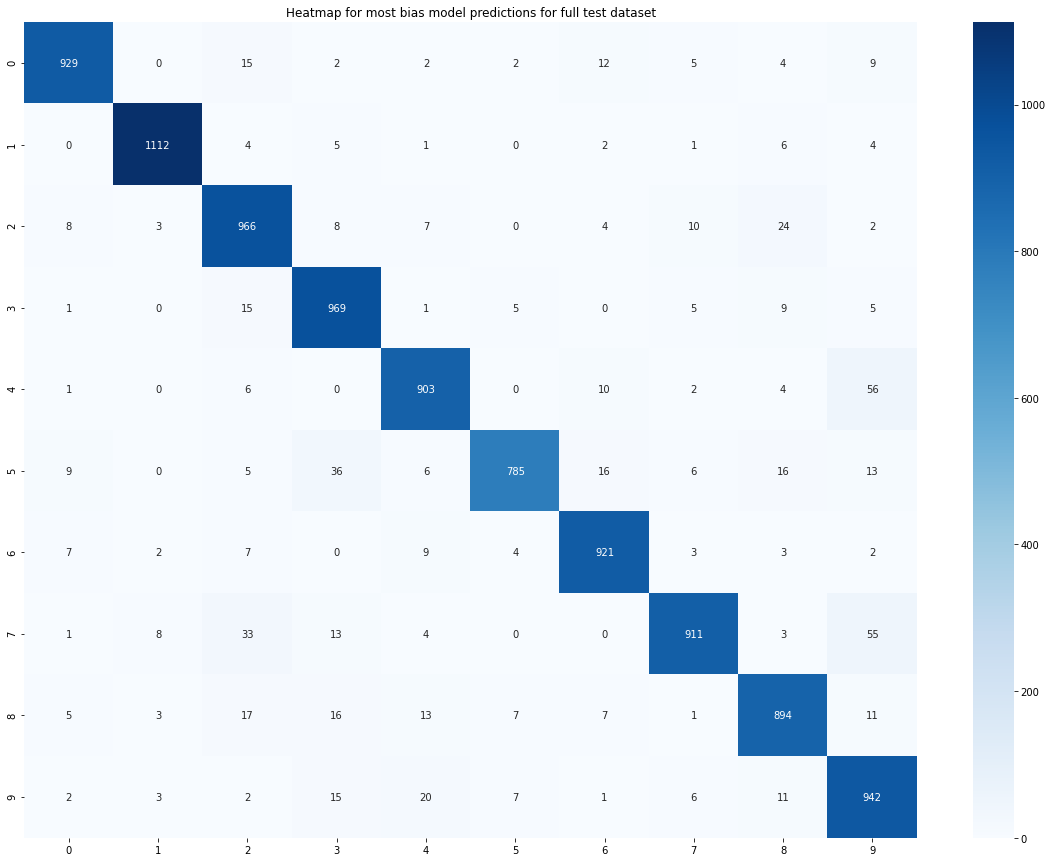

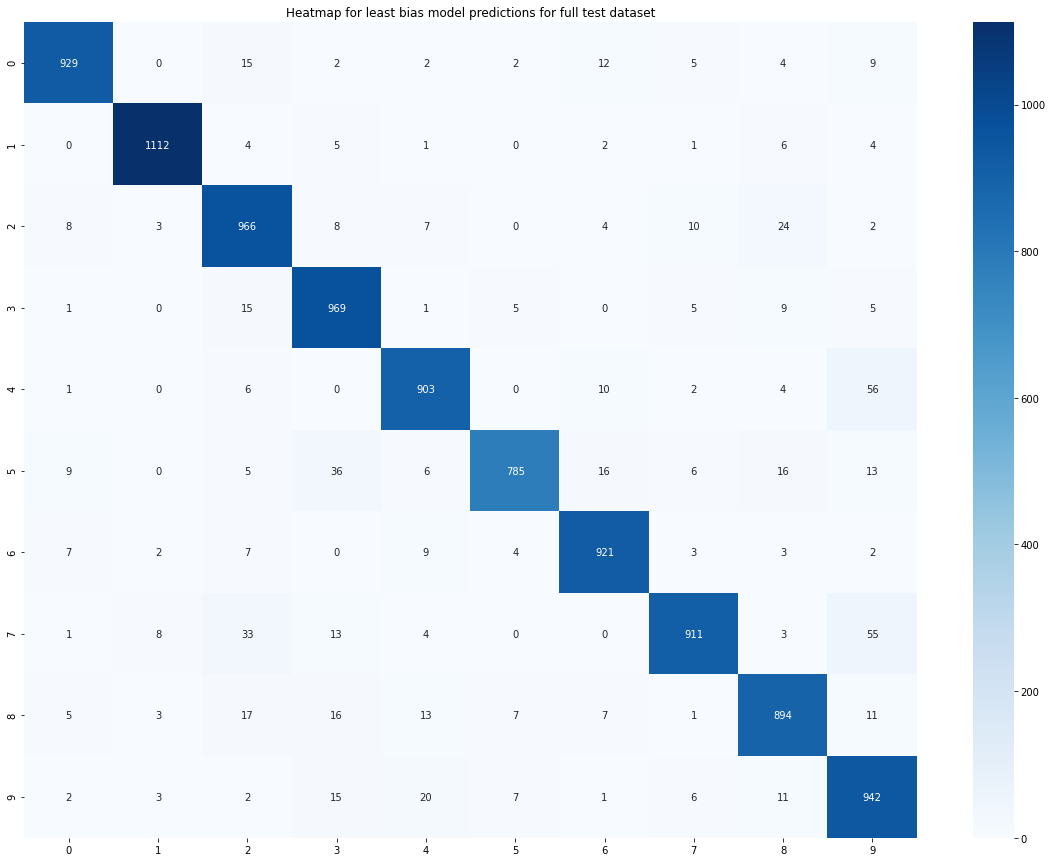

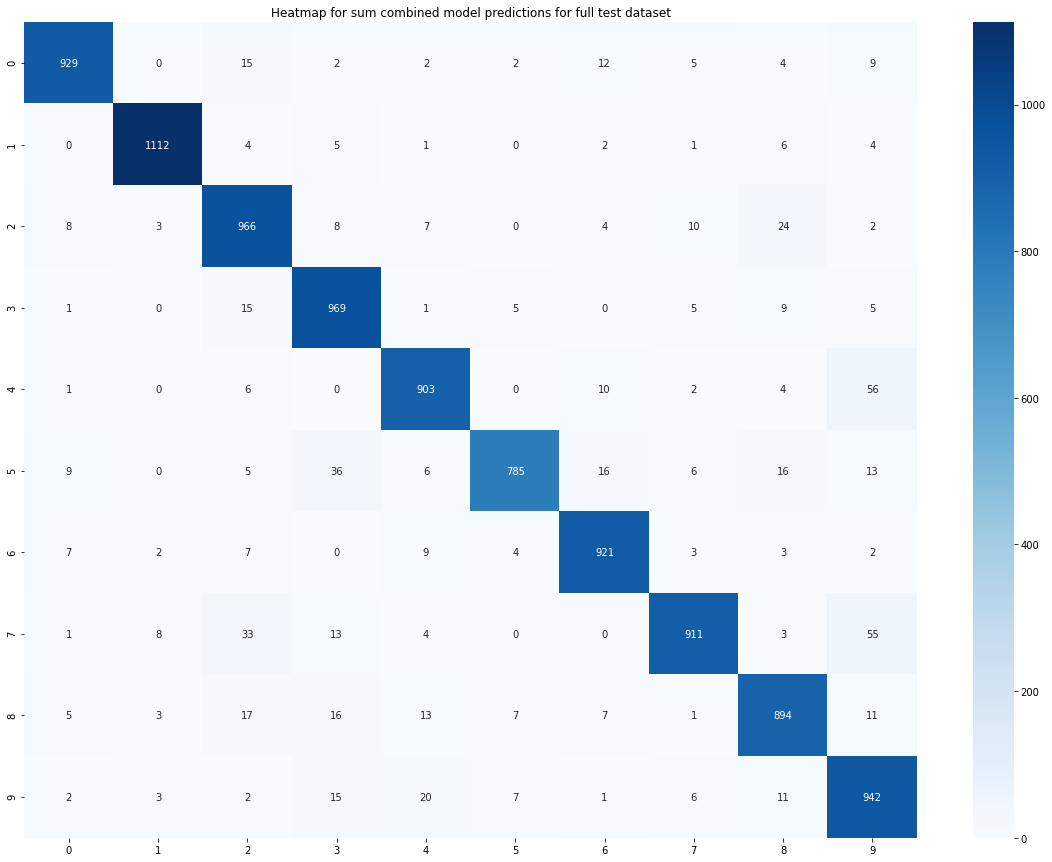

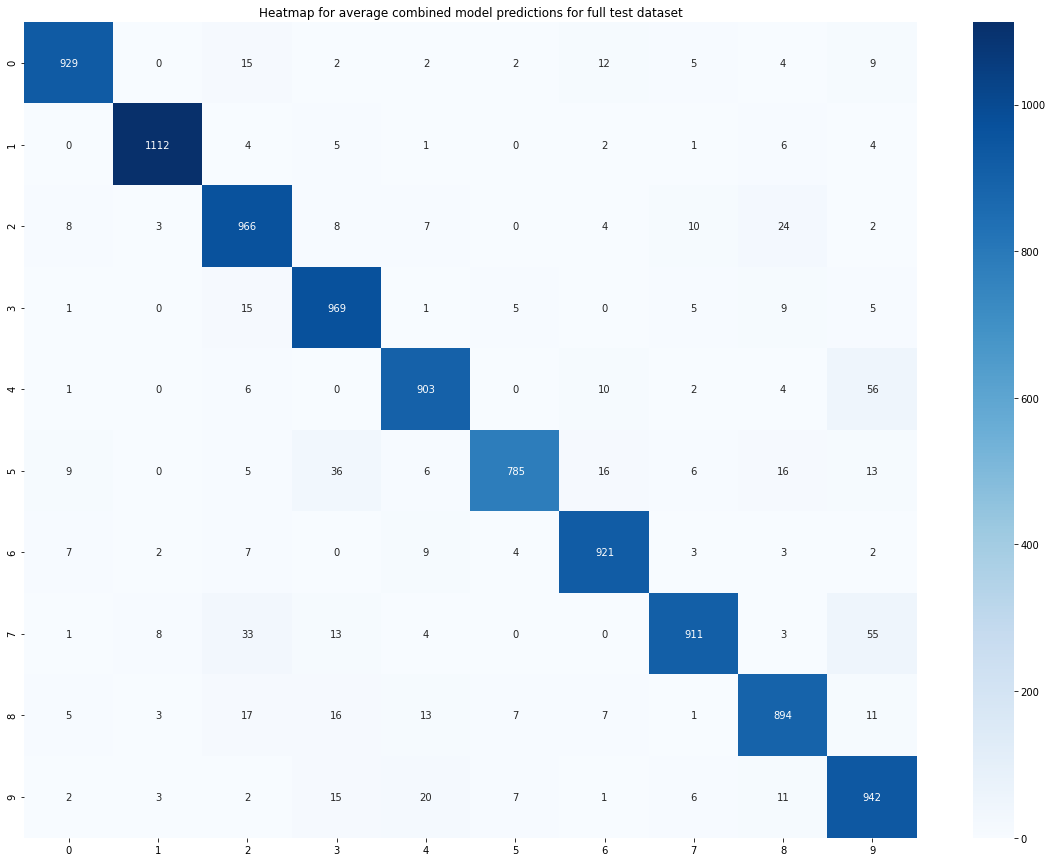

In [46]:
#Printing confusion matrix of all 3 model predictions for full datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns

lm = predictions_full['most_bias']
ll = predictions_full['least_bias']
lcs = predictions_full['combined_sum']
lca = predictions_full['combined_avg']

#Create confusion matrix for NN Model and calculating accuracy for most bias model
nn_cm = confusion_matrix(test_y, lm)
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
axis.set_title('Heatmap for most bias model predictions for full test dataset')


#Create confusion matrix for NN Model and calculating accuracy for least bias model
nn_cm = confusion_matrix(test_y, ll)
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
axis.set_title('Heatmap for least bias model predictions for full test dataset')

#Create confusion matrix for NN Model and calculating accuracy for sum combined model
nn_cm = confusion_matrix(test_y, lcs)
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
axis.set_title('Heatmap for sum combined model predictions for full test dataset')

#Create confusion matrix for NN Model and calculating accuracy for average combined model
nn_cm = confusion_matrix(test_y, lca)
plt.figure(figsize=(20, 15))
axis = plt.subplot(111)
sns.heatmap(nn_cm, ax = axis, cmap = 'Blues', annot = True, square = False, fmt='')
axis.set_title('Heatmap for average combined model predictions for full test dataset')

In [48]:
final_table = pd.read_csv('FinalTable.csv')
pd.set_option('display.max_colwidth', None)
final_table

,Sr. No.,Model,Accuracy based on confusion matrix,F1 Score (micro),F1 Score (macro),AUC Score
0,1,Baseline model trained with input shape of 28*28 flattened at the beginning of the model,0.9682,0.9682,0.967887,0.982254
1,2,Baseline model trained with flatenned input and reduced dimensionality (45 dimensions),0.9669,0.9669,0.966684,0.981479
2,1a,Test Dataset 1 ( With Most Bias Model),0.9045,0.9045,0.904072,0.946242
3,1b,Test Dataset 1 ( With Least Bias Model),0.9045,0.9045,0.904072,0.946242
4,1c,Test Dataset 1 ( With Combined Model using Sum Probabilities),0.9045,0.9045,0.904072,0.946242
5,1d,Test Dataset 1 ( With Combined Model using Average Probabilities),0.9045,0.9045,0.904072,0.946242
6,2a,Test Dataset 1 ( With Most Bias Model),0.9125,0.9125,0.912316,0.951172
7,2b,Test Dataset 1 ( With Least Bias Model),0.9275,0.9275,0.927277,0.959637
8,2c,Test Dataset 1 ( With Combined Model using Sum Probabilities),0.9410,0.9410,0.940781,0.967036
9,2d,Test Dataset 1 ( With Combined Model using Average Probabilities),0.9410,0.9410,0.940781,0.967036
